In [24]:
from IPython.core.display import HTML
css_file = 'css/ngcmstyle.css'
HTML(open(css_file, "r").read())

In [109]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw Python code, click <a href="javascript:code_toggle()">
[<code style="background-color:brown;color:yellow;"> here </code>]</a>.''')

# Stochastic Prediction Model, <br><small>Case of Dengue Outbreak in Tainan, 2015</small>

## Part 1

### Data Cleaning and Visualization

Data 
---
- [Tainan Goverment](http://data.tainan.gov.tw/dataset/denguefevercases): cases data

- [Tainan Goverment](http://data.tainan.gov.tw/dataset/2015-df-mosquito-density): density of vector masquitos




Note
---
- vector mosquito: Aedes aegypt (埃及斑蚊), Aedes albopictus（及白線斑蚊）
- Breteau Index (布氏指數): KaoKsuing<br>
    ```布氏指數=8.349×誘蚊產卵器陽性率+4.972```

- This data is recorded in *big5* encoding and have to converted into **utf-8** in advanced. The worse, data are partly in **big5** encoding and partly in **utf-8** encoding.
  - Libreoffice:
    
    ```
    [Save As:] ...
    
    File type: Text csv(.csv)
      √ automatic file extensions
      √ Edit file setting
      
    --------------------
            Use TeXt CSV Format                    
    --------------------
    
    Character set: Unicode (UTF 8)
    ```
  - iconv   
    ```shell
    > iconv -c -t utf8 data.csv > data_utf8.csv
    ```
- Also change the names of column in English    

In [1]:
%matplotlib inline

In [1]:
import qgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmplot
import seaborn as sns
from ipywidgets import interact,widgets,interactive
from IPython.display import display,clear_output
import warnings
warnings.filterwarnings('ignore')

sns.set()

Economic Systems Info
---

In [29]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [31]:
%watermark -a "" -v -p numpy,scipy,matplotlib,seaborn,pandas,qgrid,ipywidgets,arch,statsmodels,\
gmplot,matplotlib,notebook

CPython 3.6.0
IPython 6.1.0

numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
seaborn 0.7.1
pandas 0.20.2
qgrid n
ipywidgets 6.0.0
arch 4.1
statsmodels 0.8.0
gmplot n
matplotlib 2.0.2
notebook 5.0.0


In [3]:
import sys
pd.options.display.encoding = sys.stdout.encoding

In [2]:
qgrid.nbinstall(overwrite=True) 

In [3]:
qgrid.set_defaults(remote_js=True, precision=4)

Data Sources
---
<a href="http://data.tainan.gov.tw/dataset/dengue-dist">Tainan City Government</a>

In [ ]:
df = pd.DataFrame.from_csv('data/dengue104-2-en.csv',index_col=0,parse_dates=[0],encoding="utf-8")
#df = df.sort_index()
df.info()

Concat two dataframes, 2015 and 2016
---
into ```test.csv```


In [ ]:
df2016 = pd.DataFrame.from_csv('data/dengue105-1.csv',index_col=0,parse_dates=[0],encoding="utf-8")
#df = df.sort_index()
frames = [df, df2016]
result = pd.concat(frames)


In [ ]:
result.to_csv("data/test.csv")

Subjects
---

- update the last data and make observation again

**Note**

The data downloaded from offical site were wrongly encoded in different codes. To capable of accessing the data, we have to re-encode the data. You can download it from github:

https://github.com/cchuang2009/math-2015-2/1/data/1018-en.csv

Subjects
---

- update the last data and make observation again

**Note**

The data downloaded from offical site were wrongly encoded in different codes. To capable of accessing the data, we have to re-encode the data. You can download it from github:

https://github.com/cchuang2009/math-2015-2/1/data/1018-en.csv

Subjects
---

- update the last data and make observation again

**Note**

The data downloaded from offical site were wrongly encoded in different codes. To capable of accessing the data, we have to re-encode the data. You can download it from github:

https://github.com/cchuang2009/math-2015-2/1/data/1018-en.csv

In [5]:
df = pd.DataFrame.from_csv('data/test.csv',index_col=0,parse_dates=[0],encoding="utf-8")
#df = df.sort_index()
#result = df.sort(['A', 'B'], ascending=[1, 0])

#convert Date format from YY/MM/DD to YY-MM-DD
df['date']=pd.to_datetime(df['date'])

# before we accumulate the number of suspectives at each day, we add a new colume, num=1
df['num']=1

In [6]:
cases=df[['date','num','district']]
cases.tail(3)

date  num district
index                         
11    2016-01-13    1      安平區
12    2016-01-18    1       東區
13    2016-01-20    1      龍崎區

In [ ]:
df.to_csv("data/tainan-2016-native.csv")

To let qgrid work again (with ipywidget-6.0.0+), change
```
qgrid.show_grid(df) 
  |
  V
qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})

```
Also, new Jupyter notebook limits the iopub data rate; enlarge the rate in configuration, 
**jupyter_notebook_config.py*** as follows:
```
NotebookApp.iopub_data_rate_limit=10000000000
```

Note
---
Fast development of ipywidgets provides much advantages of data display, flexibility, interactivity on browser; disavantge due to its update rate also affect the the third-parckages: **qgrid-0.3.2** can't work since IPython > 6!

In [6]:
qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})


Accumulation numbers of cases:
--

In [36]:
#  grouped data with respect to the date
cases_group = cases.groupby('date');
#cases_group.size()

In [38]:
# calculate the accumulated number of cases

cases_totals = cases_group.sum()
#cases_totals.sort(columns='num').head()
#cases_totals.tail()

In [ ]:
cases_totals.to_csv("data/taiwan-2016-by-date.csv")

First eys on Data Visualization
---

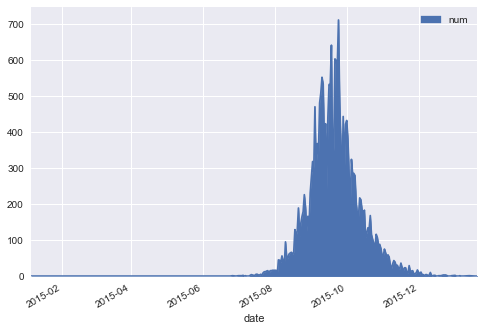

In [39]:

my_plot = cases_totals.plot(kind='area')

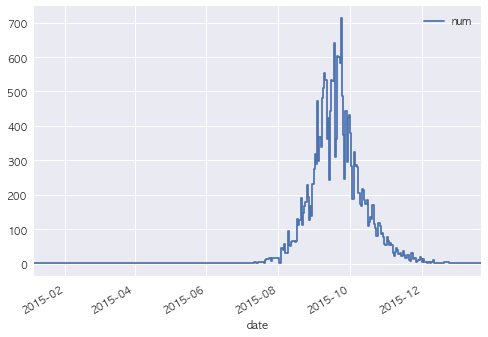

In [108]:
# or this one is better
my_plot = cases_totals.plot(drawstyle='steps')

In [43]:
#  grouped data with respect to the date and district
cases_group1 = cases.groupby(['date','district']);
cases_1 = cases.groupby(['date','district'])[['num']].sum();

# districts' names
#print(cases_1.index[2][:])

In [44]:
# retrieve sequences of district names of data data
district=df.district.tolist()
ndistrict=set(district)

print(ndistrict)

{'新市區', '安定區', '佳里區', '永康區', '歸仁區', '關廟區', '安平區', '將軍區', '仁德區', '左鎮區', '新化區', '東山區', '大內區', '後壁區', '下營區', '白河區', '南區', '西港區', '中西區', '山上區', '七股區', '學甲區', '安南區', '玉井區', '新營區', '麻豆區', '永康區 ', '東區', '北區', '善化區', '柳營區', '楠西區', '南化區', '鹽水區', '六甲區', '官田區', '龍崎區'}


In [ ]:
cases_1.to_csv("data/taiwan-2016-by-date-and-district.csv")

In [45]:
from matplotlib.font_manager import FontProperties
#myFont = FontProperties('/Users/cch/Downloads/kaiu.ttf')
# change font for Traditional Chinese Language
plt.rcParams['font.sans-serif'] = ['LiHei Pro']
plt.rcParams['font.size']=18

myFont = FontProperties('AR PL New Kai')

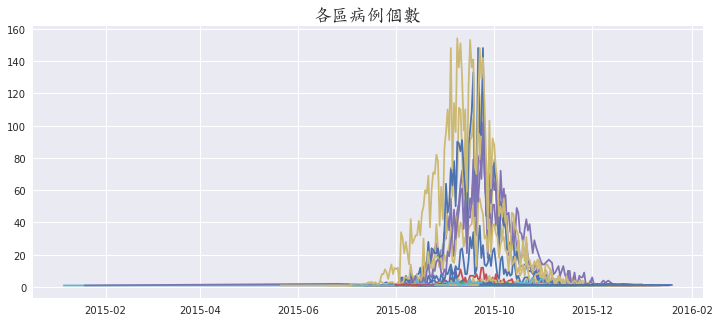

In [46]:
#plt.rcParams['axes.unicode_minus'] = False
ndistrict=list(ndistrict)

kind=0
plt.figure(figsize=(12,5))
for k in ndistrict:
    plt.plot(cases_1.xs(k,level='district'),label=k)
    #plt.legend(k)
    plt.title(u"各區病例個數",fontsize=30,fontproperties = myFont)
    kind=kind+1 

In [56]:
# define dropdown options
w = widgets.Dropdown(
    options=ndistrict,
    value=ndistrict[9],
    description='District:',
)

# make plot for selected district

def plot_district_case(district_area):   
    plt.rcParams['font.family'] = 'AppleGothic' 
    
    plt.plot(cases_1.xs(district_area,level='district'),drawstyle='steps')
    #plt.legend(k)
    plt.title(district_area+" 病例",fontproperties = myFont) ;
    #plt.ylim([1,160])
    clear_output(True)
    

<function __main__.plot_district_case>

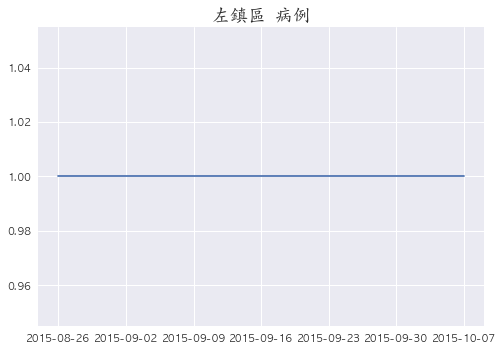

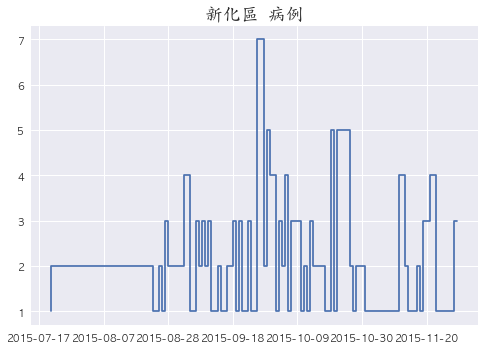

In [57]:
tool=interact(plot_district_case, district_area=w);
display(tool)

Mosquitos Data
---

In [59]:
df_mosquito2 = pd.DataFrame.from_csv('data/mosquito-re1.csv',index_col=['date'],encoding="utf-8")


In [ ]:
df_mosquito2 = pd.DataFrame.from_csv('data/mosquito-re1.csv',index_col=['date'],encoding="utf-8")

for DistName in ndistrict:
    #plt.plot(df_mosquito2.xs(k,level='district'),label=k)
    #print(DistName)
    if DistName!='永康區':
       df_mosquito2[df_mosquito2['district']==DistName]['BIndex'].plot()
    else:
       df_mosquito2[df_mosquito2['district']=='永康區']['BIndex'].plot()
    #plt.legend(k)
    plt.title("Breteau Index",fontsize=30)#,fontproperties = myFont)

ipywidgets Enhancement
---

In [62]:
import ipywidgets as widgets
from ipywidgets import interactive,interact
 
items = ['All']+sorted(df_mosquito2['district'].unique().tolist())
 
def view(x=''):
    if x=='All': 
        return df_mosquito2
    else: return df_mosquito2[df_mosquito2['district']==x]
 
w = widgets.Select(options=items)
interact(view, x=w)

<function __main__.view>

In [64]:
def view2(x='',y=3):
    if x=='All': return df_mosquito2.head(y)
    return df_mosquito2[df_mosquito2['district']==x].head(y)
 
a_slider = widgets.IntSlider(min=0, max=15, step=1, value=5)
b_select =  widgets.Select(options=items)
widgets.interact(view2,y=a_slider,x=b_select)

<function __main__.view2>

In [114]:
ndistrict1={'仁德區', '楠西區', '新化區', '北區', '白河區', '東區', '大內區', '歸仁區', '善化區', '永康區', '學甲區', '山上區', '安南區', '新市區', '西港區', '七股區', '下營區', '龍崎區', '中西區', '官田區', '東山區', '南化區', '麻豆區', '佳里區', '安定區', '安平區', '關廟區', '柳營區', '永康區', '玉井區', '六甲區', '後壁區', '新營區', '將軍區', '左鎮區', '南區', '鹽水區'}

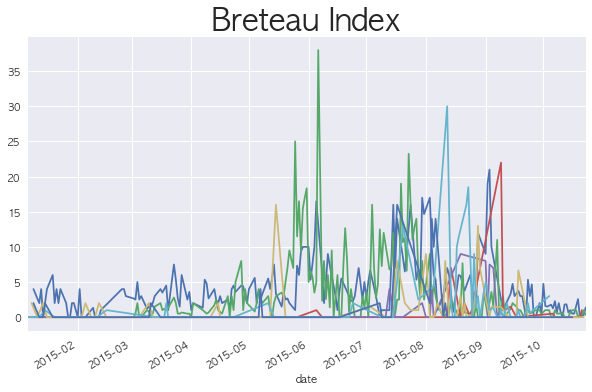

In [66]:
df_mosquito2 = pd.DataFrame.from_csv('data/mosquito-re1.csv',index_col=['date'],encoding="utf-8")
plt.figure(figsize=(10,6))
for DistName in ndistrict1:
    #plt.plot(df_mosquito2.xs(k,level='district'),label=k)
    #print(DistName)
    df_mosquito2[df_mosquito2['district']==DistName]['BIndex'].plot()
    #df_mosquito2[df_mosquito2['district']=="北區"]['BIndex'].plot()
    #plt.legend(k)
   
    plt.title("Breteau Index",fontsize=30)#,fontproperties = myFont)

(0, 40)

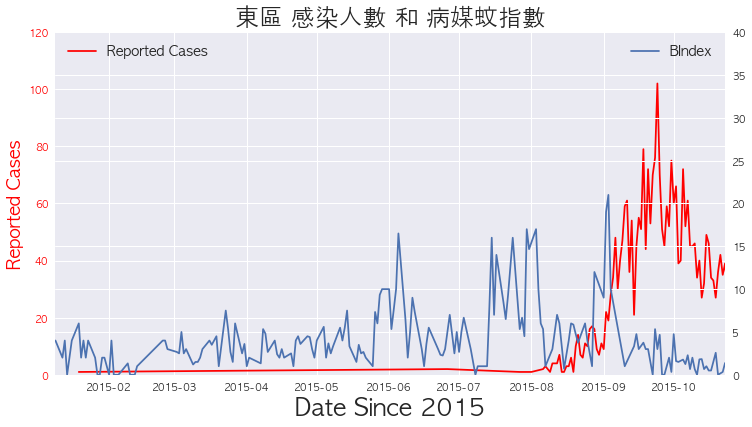

In [67]:
#rcParams['font.family'] = 'AR PL New Kai' 
# rcParams['font.family'] = 'LiHei Pro' 
#rcParams['font.family'] = 'AppleGothic' 

fig, ax1 = plt.subplots(figsize=(12,7))
plt.rcParams['font.sans-serif']=['AR PL New Kai'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
ax1.plot(cases_1.xs('東區',level='district'),color='red',label='Reported Cases')
ax1.set_ylabel('Reported Cases',fontsize=18, color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('r')

ax2 = ax1.twinx()

df_mosquito2[df_mosquito2['district']=='東區']['BIndex'].plot()

ax1.legend(fontsize=14,loc='upper left')  
ax2.legend(fontsize=14)  

ax1.set_title(u'東區 感染人數 和 病媒蚊指數',fontsize=24)   
ax1.set_xlabel('Date Since 2015',fontsize=24)  
ax1.set_ylim([0,120])
ax2.set_ylim([0,40])

In [71]:
# define dropdown options
w2 = widgets.Dropdown(
    options=ndistrict,
    value=ndistrict[9],
    description='District:',
)

# make plot for selected district

def plot_mosquitos_case(district_area):     
    fig, ax1 = plt.subplots(figsize=(12,7))

    ax1.plot(cases_1.xs(district_area,level='district'),color='red',label='Reported Cases')
    ax1.set_ylabel('Reported Cases',fontsize=18, color='r')
    for tl in ax1.get_yticklabels():
        tl.set_color('r')

    ax2 = ax1.twinx()

    df_mosquito2[df_mosquito2['district']==district_area]['BIndex'].plot(label='Breteau Index',drawstyle='steps')
    ax1.legend(fontsize=14,loc='upper left')  
    ax2.legend(fontsize=14)
    ax1.set_title(district_area+u' 感染人數 和 病媒蚊指數',fontsize=24)   
    ax1.set_xlabel('Date Since 2015',fontsize=24)
    ax1.set_ylim([0,200])
    ax2.set_ylim([0,30])
    

<function __main__.plot_mosquitos_case>

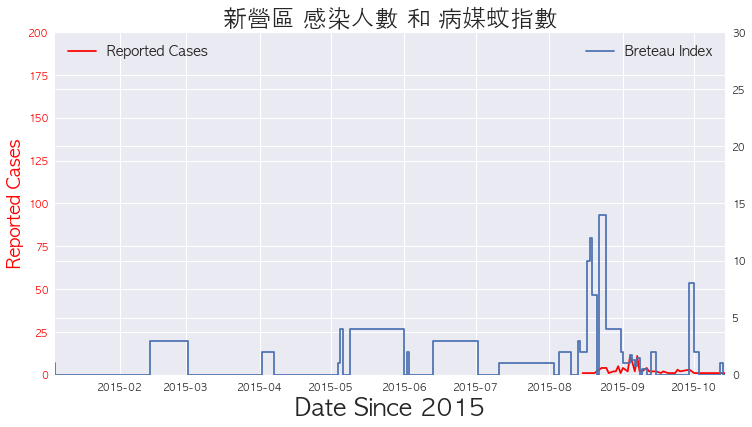

In [117]:
tool1=interact(plot_mosquitos_case, district_area=w2);
display(tool1)

We have observed the serious condition about dengue spreading we have to face; however, the situation of the dengue fever is still not discussed. Stay tune, we will make more detailed  survey.

<div align="center" ><big> <font color="red" >Too much data to make observation frustrated <br>and too few to get uncertain.</font></big></div>

Resample

   &nbsp;&nbsp;&nbsp;**cases=df[['date','num']]** 

by other units (week, or month etc)

If we want to look at the data by month, we can easily resample and sum it all up. You’ll notice I’m using ‘<font color="red">*M*</font>’ as the unit of time period for resampling which means the data should be resampled on a month boundary.

In [75]:
cases_patterns = cases.set_index('date')
#cases_patterns.head()
#cases_patterns.tail()

In [76]:
cases_patterns.to_csv("data/taiwan-2016-by-date-pattern.csv")

In [78]:
cases_patterns_month=cases_patterns.resample('M',how=sum)
#cases_patterns_month

In [ ]:
cases_patterns_month.to_csv("data/taiwan-2016-by-month-pattern.csv")

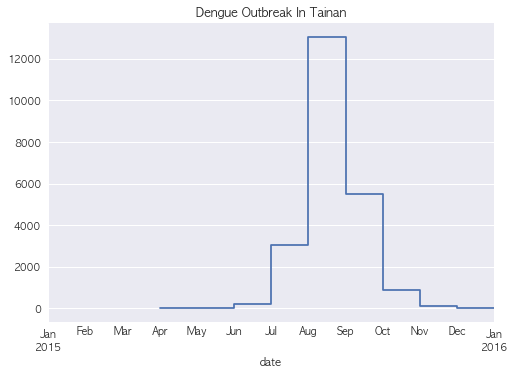

In [80]:
cases_plot = cases_patterns.resample('M',how=sum)\
            .plot(title="Dengue Outbreak In Tainan",drawstyle='steps',legend=None)


In [82]:
cases_patterns_week=cases_patterns.resample('W',how=sum)
#cases_patterns_week

In [ ]:
cases_patterns_week.to_csv("data/taiwan-2016-by-week-pattern.csv")

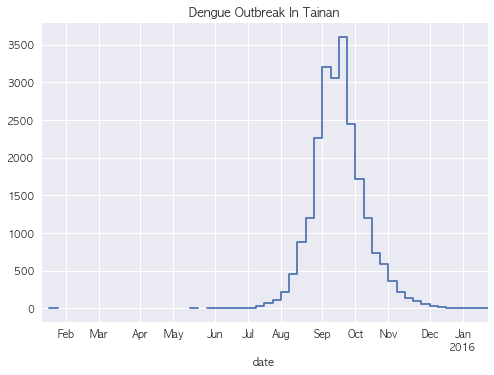

In [83]:
cases_plot = (cases_patterns.resample('W',how=sum))\
            .plot(title="Dengue Outbreak In Tainan",legend=None,drawstyle='steps')

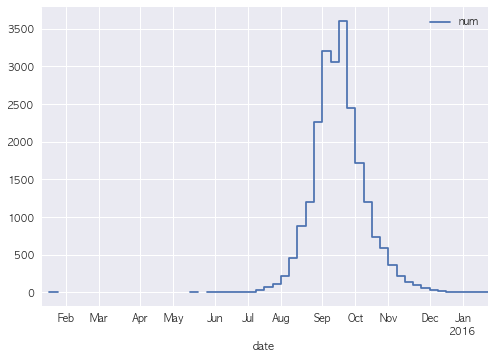

In [85]:
df3_1018=cases_patterns.resample('w',how=sum)
df3_1018.plot(drawstyle='steps')

In [86]:
qgrid.show_grid(df3_1018,show_toolbar=True)

In [87]:
# cut off some data ahead since dengue diease was not serious under considered at the beginning 
df3_1018['ind']=np.arange(1,len(df3_1018)+1)
df4_1018=df3_1018[21:]
df4_1018.head()

num  ind
date                 
2015-06-07   1.0   22
2015-06-14   2.0   23
2015-06-21   2.0   24
2015-06-28   5.0   25
2015-07-05  10.0   26

# Infected cases per Week/Month

Later, the data would be displayed online week (month) by week (month) to investingate how the dengue trend becomes; hence the inferected cases will be grouped within unit time interval. 

In [88]:
Monthdays=['2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01', \
        '2015-08-01','2015-09-01','2015-10-01','2015-11-01','2015-12-01','2016-01-01','2016-2-01']
Mind=np.zeros(len(Monthdays),dtype=int)
def days_range(x,mondays):
    for i in range(len(mondays)):
        Mind[i]=((len((x[x['date'] < mondays[i]]))))
        
days_range(df,Monthdays)
#Mind        

**Mind**: each element is the beginning index  from the month since 2015-01-01.

However the number of cases in the "week" time period gives much details more than it in "Month" time period; we use **pandas** to  manipulate the data since June, 2015 since the count of time units in week is more than it in month:

In [89]:
weekdays=df4_1018.index
weekdays[1]

Timestamp('2015-06-14 00:00:00', freq='W-SUN')

In [90]:
# brief the timestamp data up the day
weekdays.map(lambda x: x.strftime('%Y-%m-%d'))

Index(['2015-06-07', '2015-06-14', '2015-06-21', '2015-06-28', '2015-07-05',
       '2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
       '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06', '2015-09-13',
       '2015-09-20', '2015-09-27', '2015-10-04', '2015-10-11', '2015-10-18',
       '2015-10-25', '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22',
       '2015-11-29', '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27',
       '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24'],
      dtype='object', name='date')

In [91]:
Wind=np.zeros(len(weekdays),dtype=int)
def Wdays_range(x,weekdays):
    for i in range(len(weekdays)):
        Wind[i]=((len((x[x['date'] < weekdays[i]]))))
        
Wdays_range(df,weekdays)
Wind      

array([    5,     6,     8,    14,    21,    32,    63,   127,   234,
         440,   866,  1665,  2871,  4894,  8043, 11166, 14886, 17390,
       19134, 20382, 21157, 21772, 22167, 22390, 22547, 22645, 22713,
       22744, 22758, 22769, 22777, 22782, 22784, 22786])

Nonlinear Data Fitting
---
The linear approximation is not appropriate for the update data obviously. We try to fit the update data by nonlinea relation.

In [ ]:
import scipy.optimize as opt
def f(x, a0, b0, c0):
    return a0* np.exp(-b0 * (x/20.-c0)**2) 

In [ ]:
import scipy


In [ ]:
x=df4_1018['ind']
ydata=df4_1018['num']
popt,pcov= opt.curve_fit(f, x, ydata)

In [ ]:
yfit=f(x,popt[0],popt[1],popt[2])

In [ ]:
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title(r'$%.1f \exp(- %.1f (\frac{x}{20}- %.1f)^2)$' % \
          (popt[0],popt[1],popt[2]), size=20 )
plt.xlim([0,50])
plt.legend(loc='upper left')

Question
---
- How about the change of numbers of infected in the next future?
- Predict how many infected cases during the forcoming December would be.
- Did the Typhoon, cookoo, make the situation much worse?

Coverage
---
Show me the dangerous courage that dengue has occupied



Note
---
Here, we will use the python package, basemap, to make the epidemic map. If you had installed "anaconda", you have to install the basemap by opening a terminal shell and execute the following command to install:

```shell
> [$whereCondaInstall]\bin\conda install basemap
```

[\$whereCondaInstall] is the real direction of Canda installed. We also require "JSAnimation" to make animation. Download the source and install it in the extracted directed by:

```shell
> [$whereCondaInstall]\bin\python setup.py install 
```

In [92]:
from numpy import genfromtxt


#data_file = genfromtxt('data/dengue104-2-en.csv', delimiter=',')
data_file = genfromtxt('data/test.csv', delimiter=',')
date=data_file[1:,1]
lats=data_file[1:,5]
lons=data_file[1:,6]

In [93]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

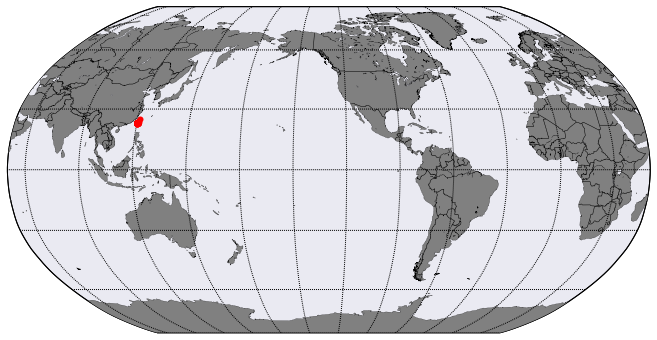

In [94]:
plt.figure(figsize=(12,6))
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines(linewidth=0.2)
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)

In [95]:
#fig = plt.figure(figsize=(5,5)) 
map_width=5
map_height=5

Taiwan is a tiny country shown in global. Let's put our focus centred at Tainan.  

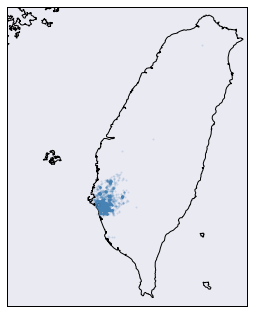

In [96]:
map = Basemap(#width=map_width,height=map_height,
              projection='mill', resolution='h', llcrnrlon=119.0 , llcrnrlat=21.8,
              urcrnrlon=122.05, urcrnrlat=25.4, lat_ts =20)

map.drawcoastlines()
map.drawmapboundary()
map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=2,color="steelblue",alpha=0.2)

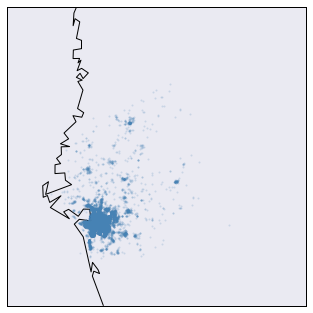

In [97]:
# Create basemap, 100 km east-west, 100 km north-south,
# intermediate resolution, Transverse Mercator projection,
# centred around lon/lat 120.4°/23.2°
map = Basemap(width=100000, height=100000,
              projection='tmerc', resolution='i',
              lon_0=120.4, lat_0=23.2)

map.drawcoastlines()
map.drawmapboundary()
map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=2,color="steelblue",alpha=0.2)

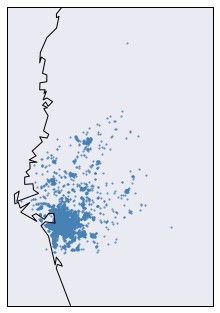

In [98]:
# Display data by scatter
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.scatter(lons, lats, latlon=True,s=3, marker='o',  color="steelblue", alpha=0.8); 

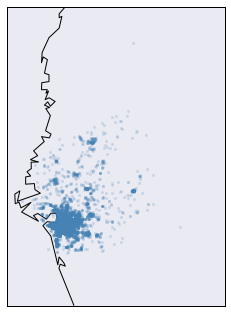

In [99]:
map = Basemap(resolution='i' ,
              llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=3, color="steelblue",alpha=0.2)

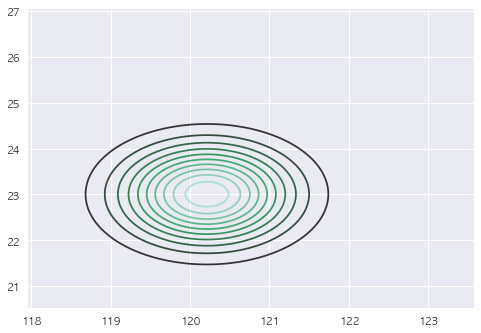

In [100]:
sns.kdeplot(lons,lats,bw=0.7)

In [ ]:
#gmap = gmplot.from_geocode("San Francisco")
gmap = gmplot.GoogleMapPlotter( 23.,120.2, 12)
kcases=10000
#gmap.plot(lats, lons, 'cornflowerblue', edge_width=10)
gmap.scatter(lats[:kcases], lons[:kcases], '#3B0B39', size=40, marker=False)
#gmap.scatter(lats[:kcases], lons[:kcases], 'b', marker=True)
gmap.heatmap(lats, lons)

gmap.draw("mymap.html")

In [ ]:
from IPython.display import HTML,clear_output, display
import glob, os
import ipywidgets as widgets

files=glob.glob("*.html")

In [ ]:
def FileBrowse():
    FileSel=widgets.Dropdown(
       options=files,
       value=files[0],
       description='File:',
    ) 
    S  = widgets.Box([widgets.Label(value='  ')],   layout=widgets.Layout(width='8%'))
    button1=widgets.Button(description='Open',disabled=False,
          button_style='',tooltip='Calculate',icon='check')
    button1.style.button_color = '#f27318'
    
    def on_button_clicked(b): 
        FileName=FileSel.value
        display(HTML('<div align="center"><iframe src=%s width="90%%", height=500></iframe></div>' %FileName))
        clear_output(True)
    button1.on_click(on_button_clicked)

    return widgets.VBox(
             [FileSel,
              widgets.HBox([S,button1])
             ])   

In [ ]:
FileBrowse()

In [1]:
from IPython.display import  IFrame
IFrame("mymap.html",width=800,height=600)

 Make a simple animation to show how it spreaded in the area.

In [103]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

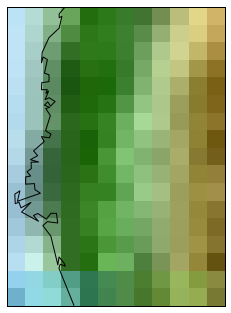

In [104]:
map = Basemap(width=map_width,height=map_height,resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
map.etopo()


In [105]:
len(np.isnan(lats[:-1])),len((lons[:-1]))

(22785, 22785)


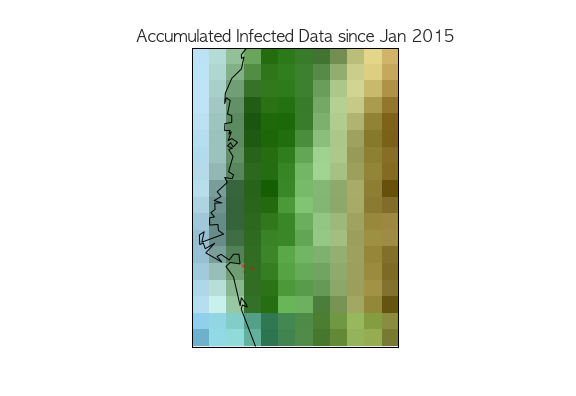
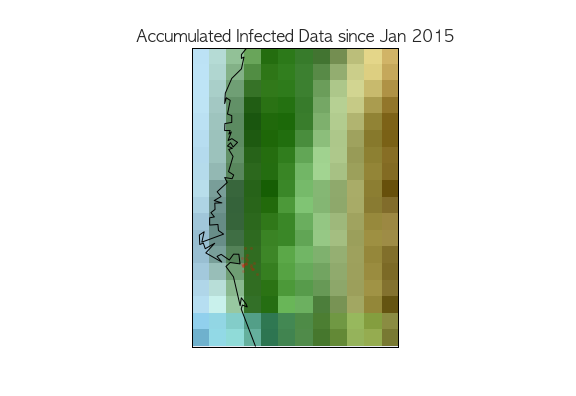
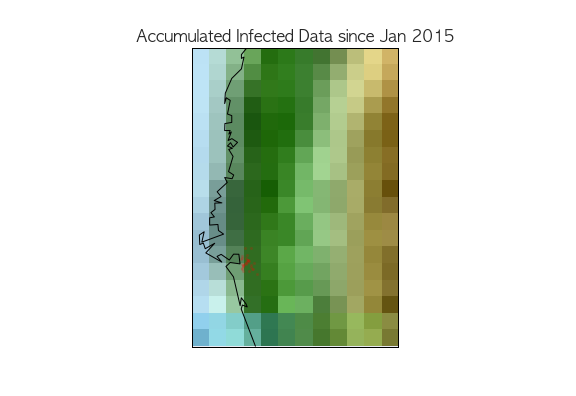
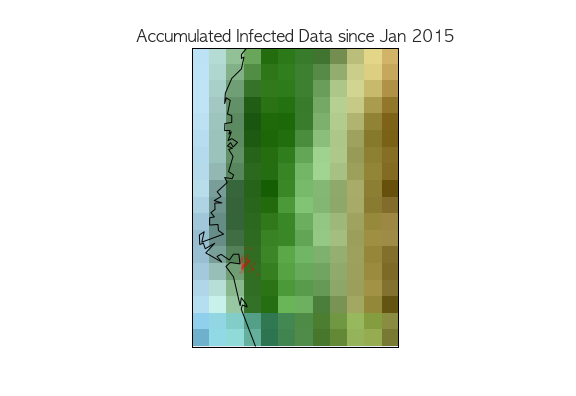
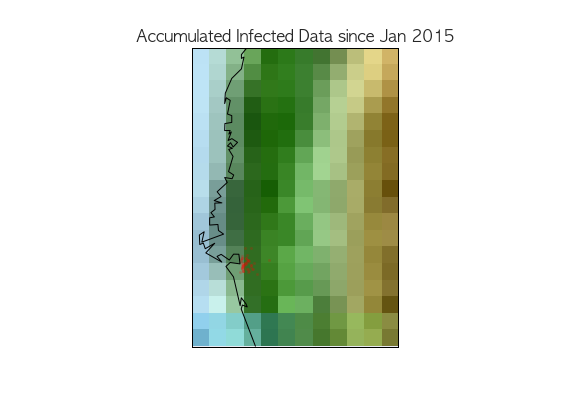
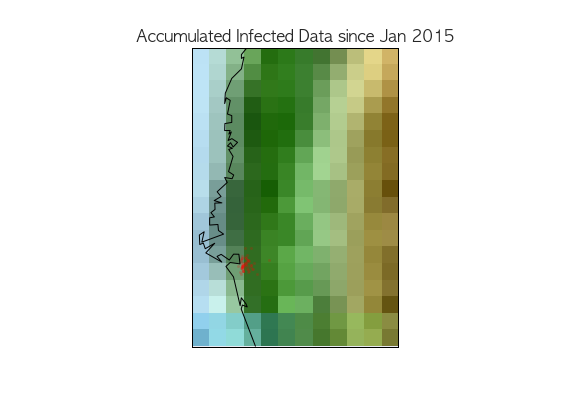
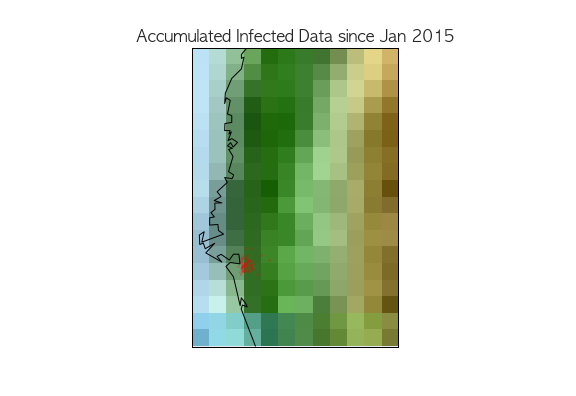
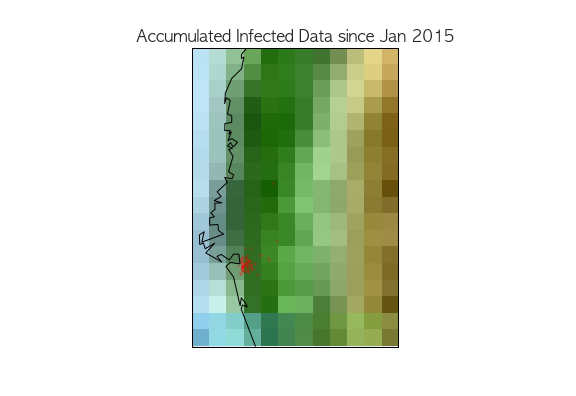
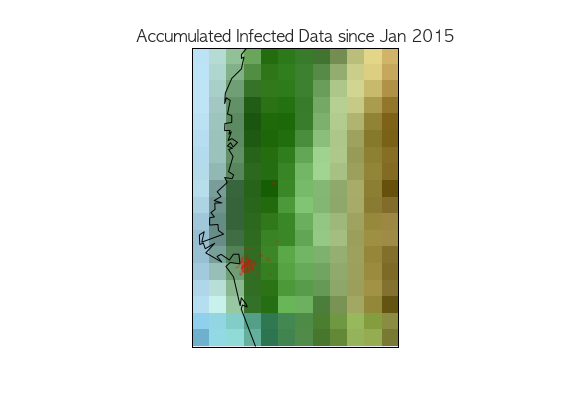
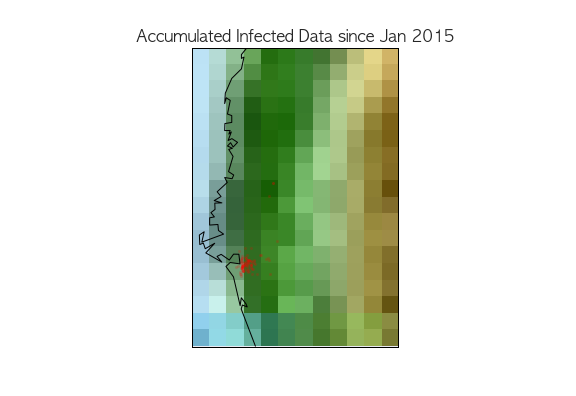
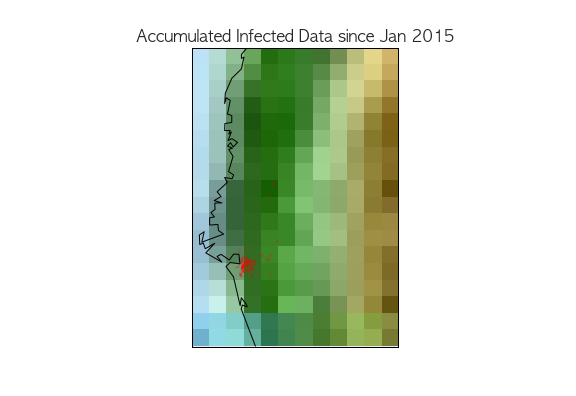
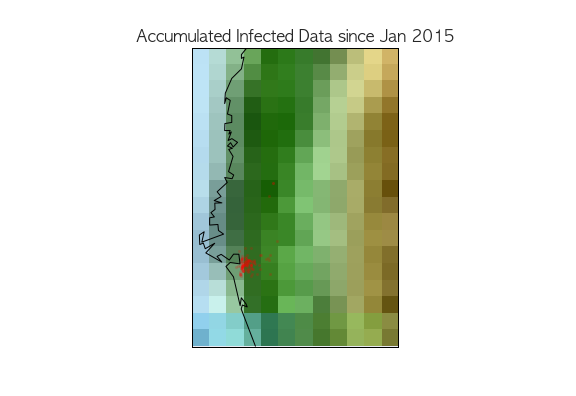
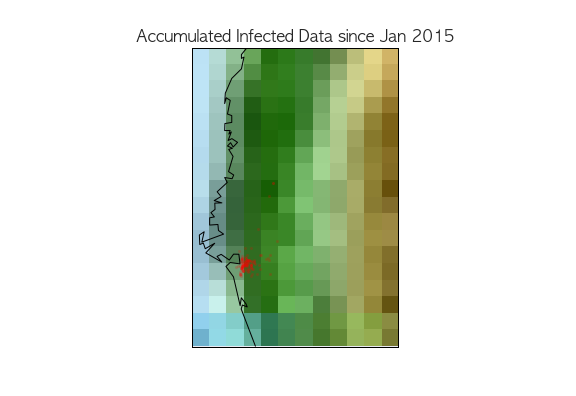
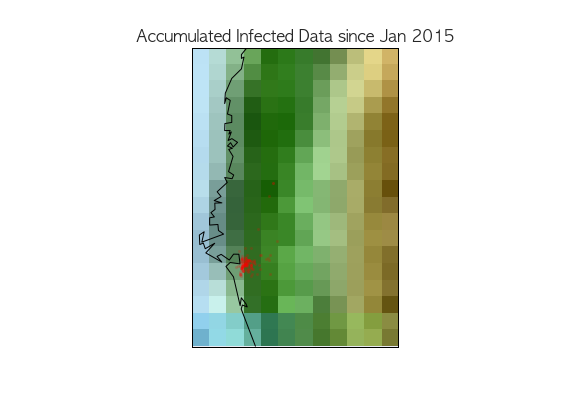
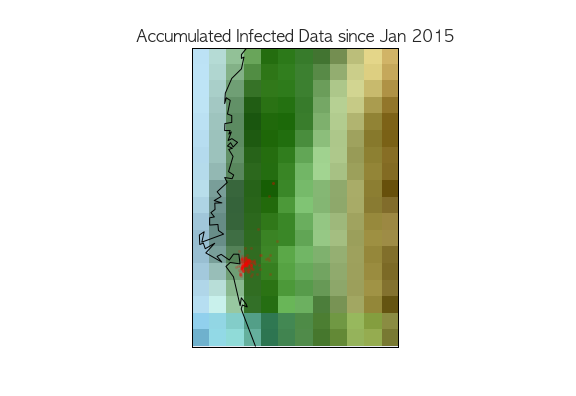
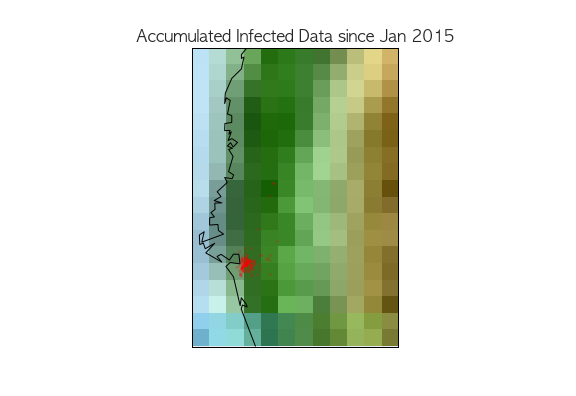
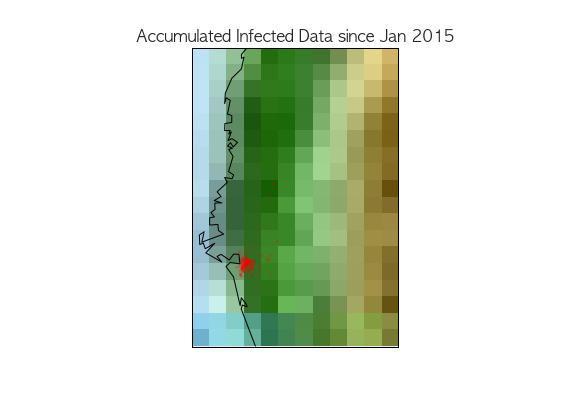
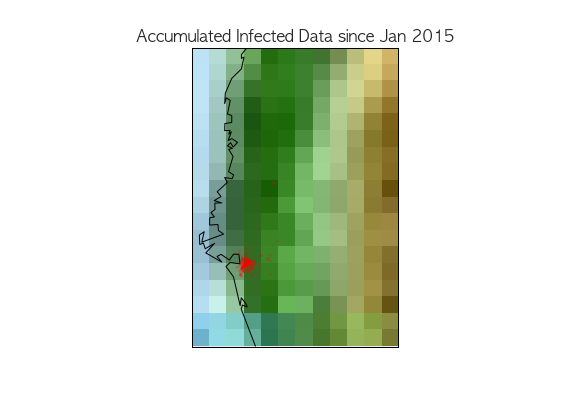
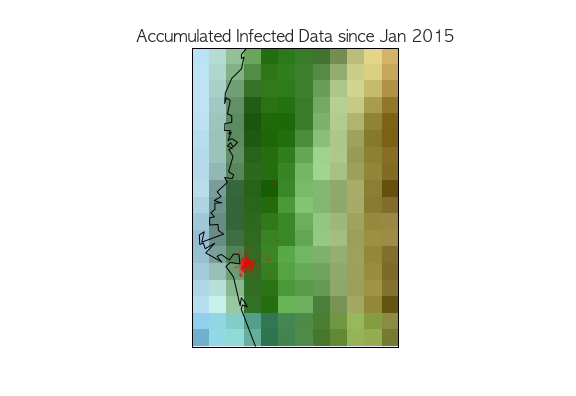
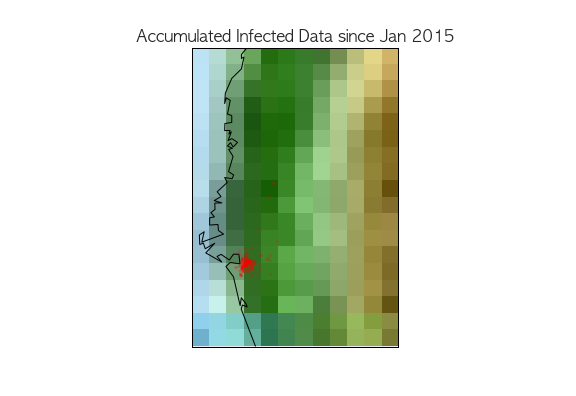
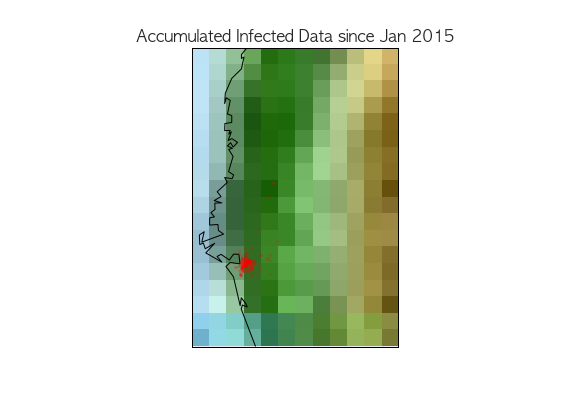
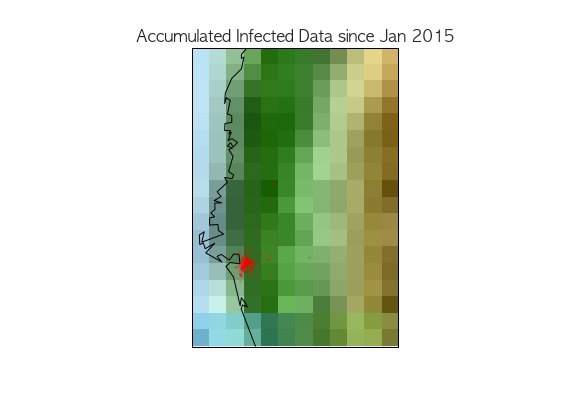
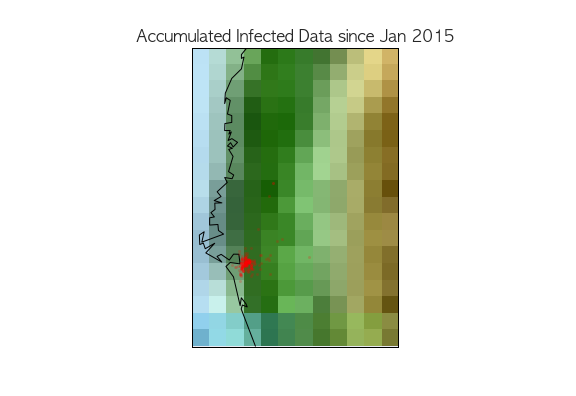
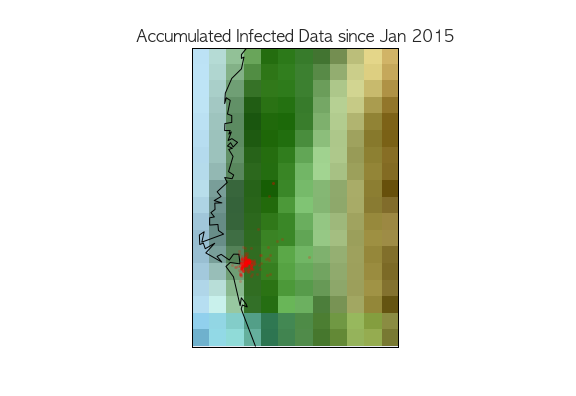
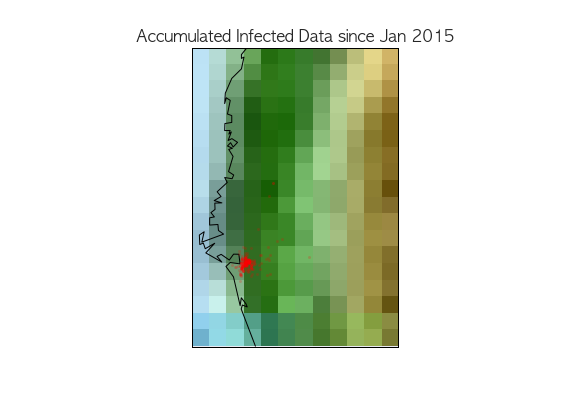
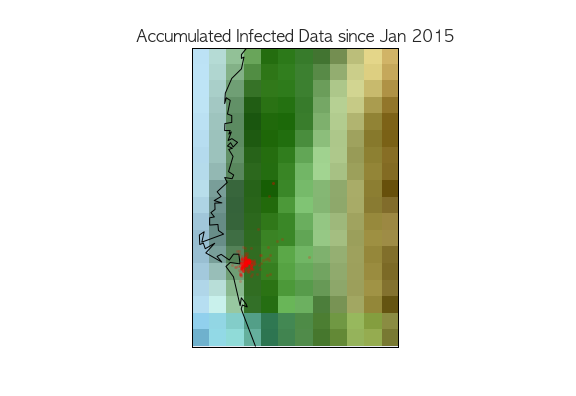
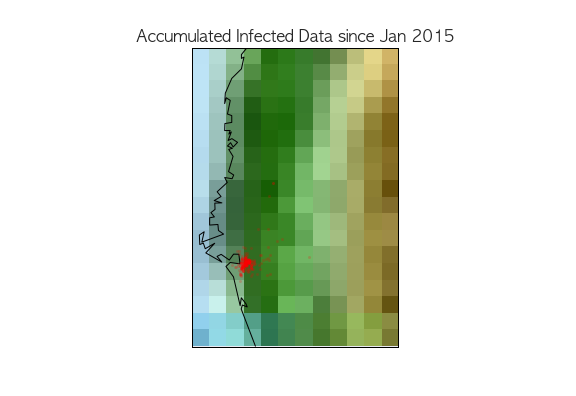
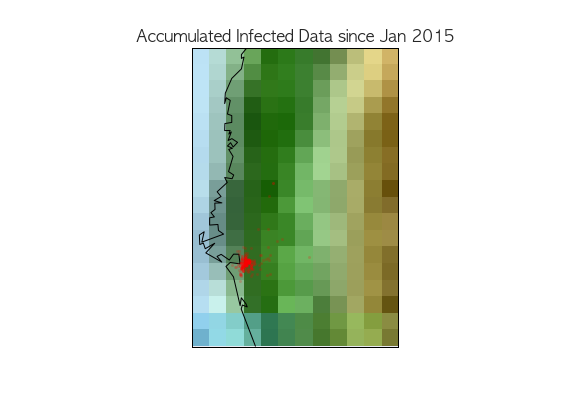
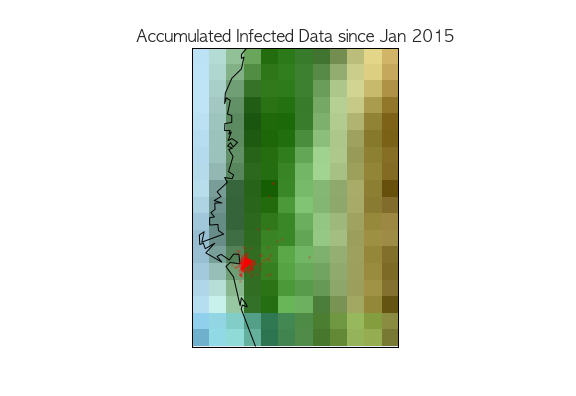
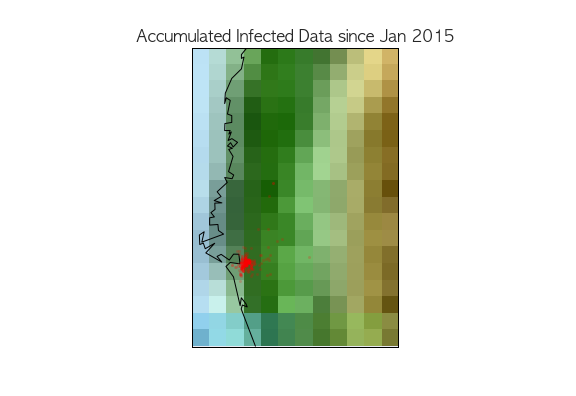
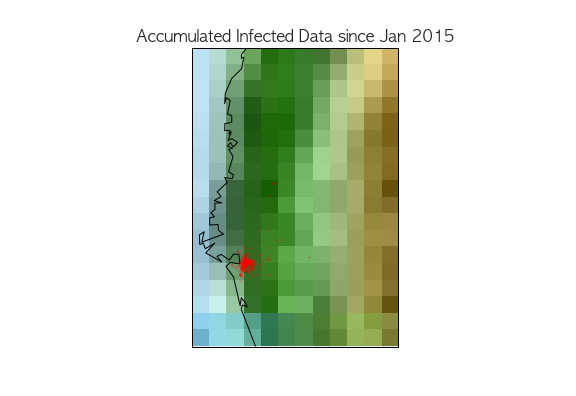
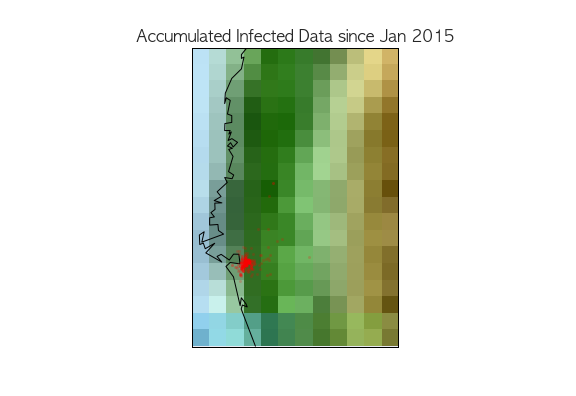
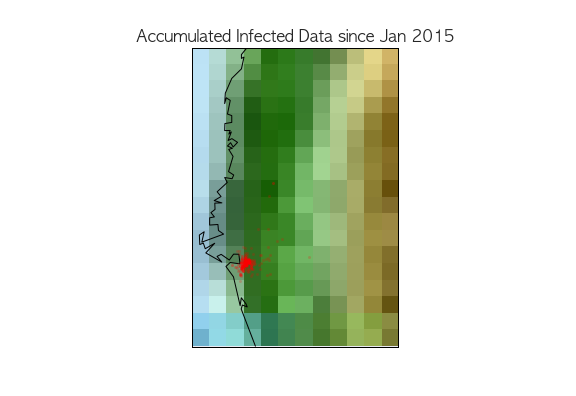
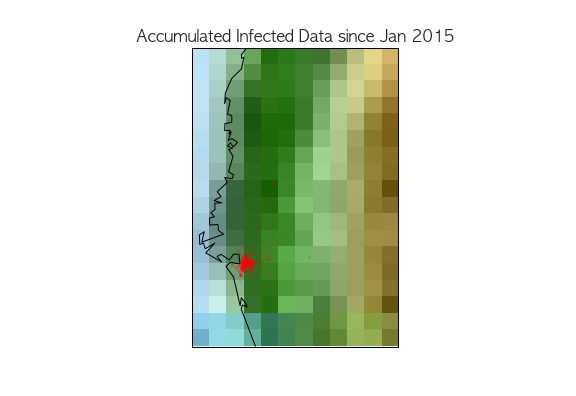
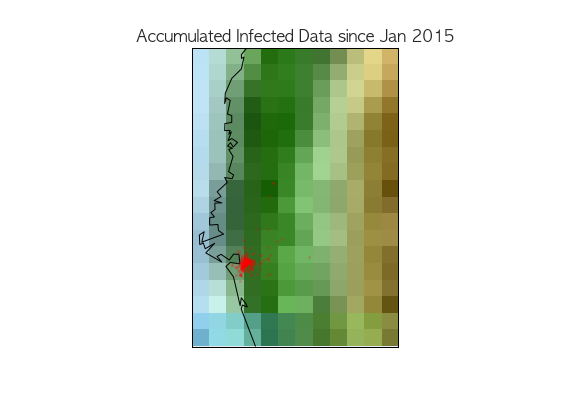
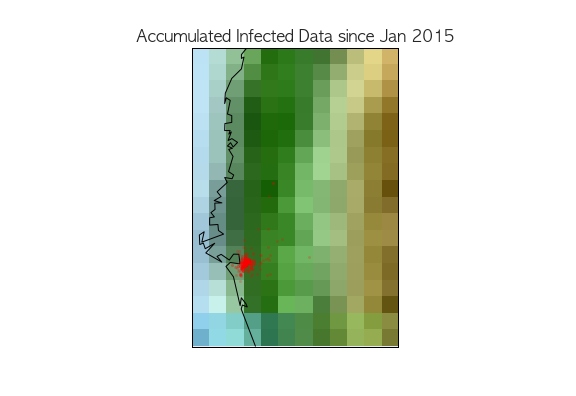
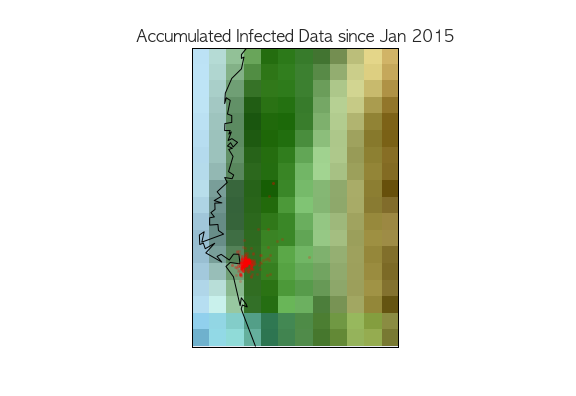
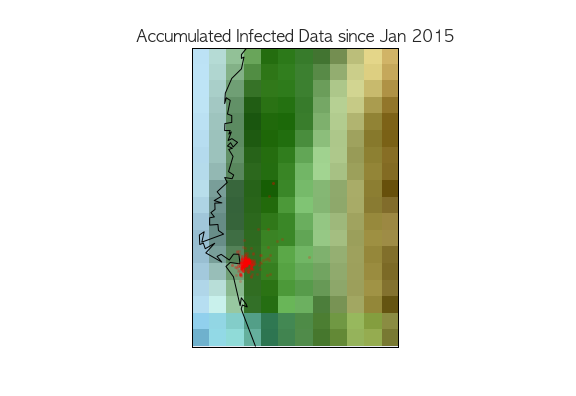
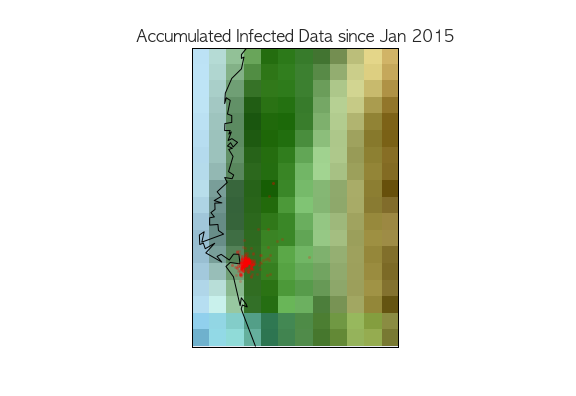
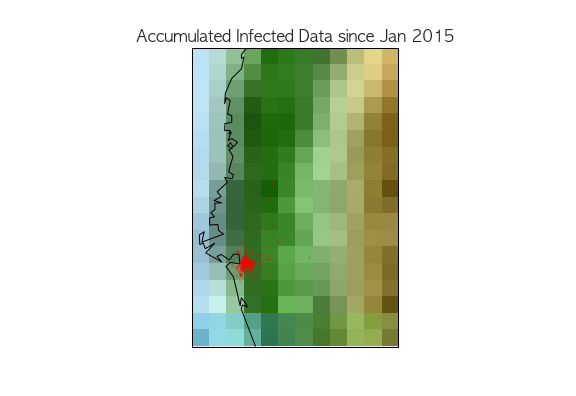
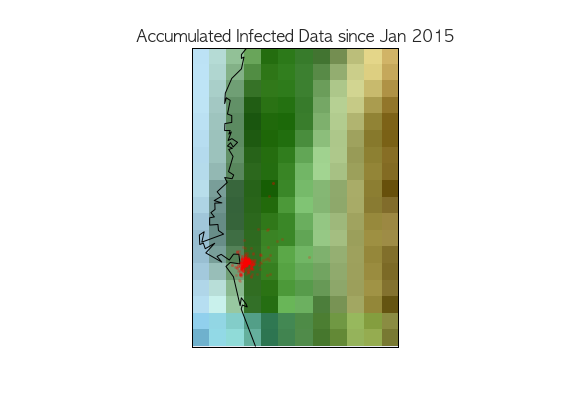
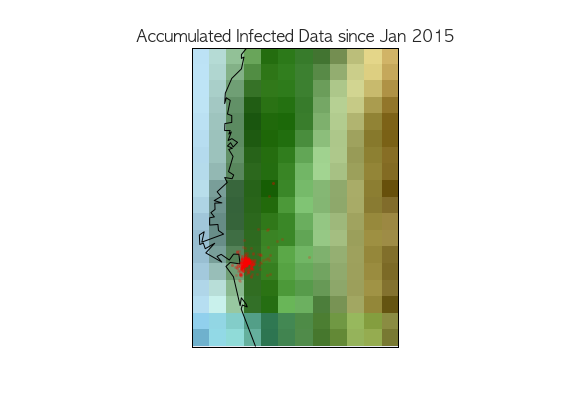
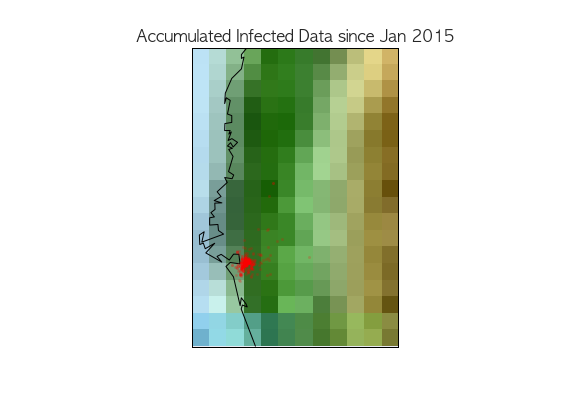
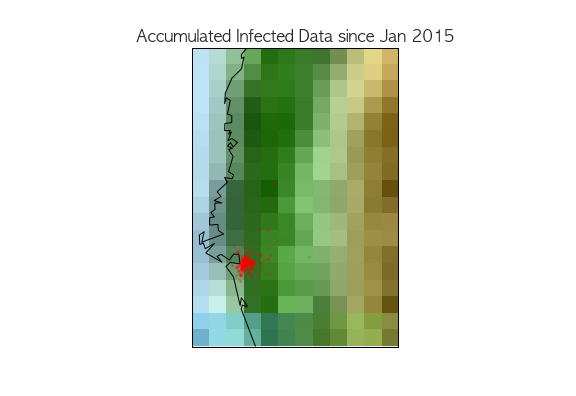
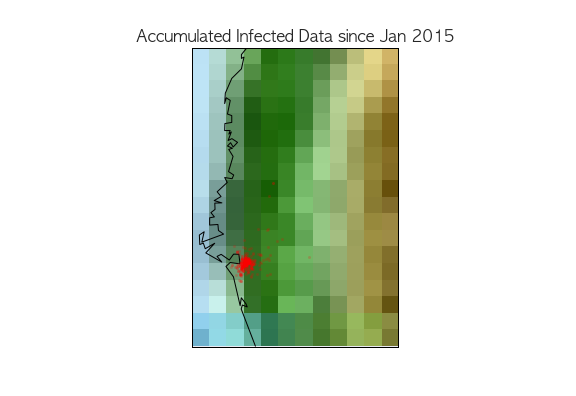
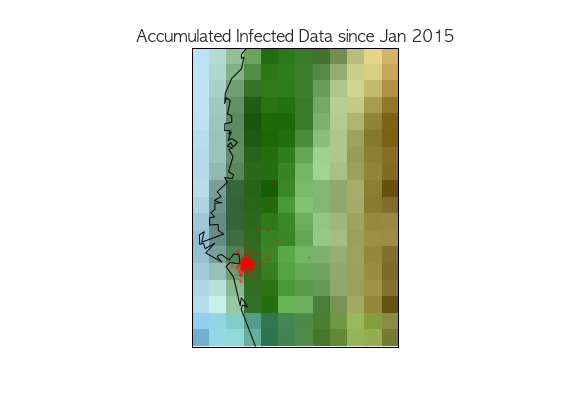
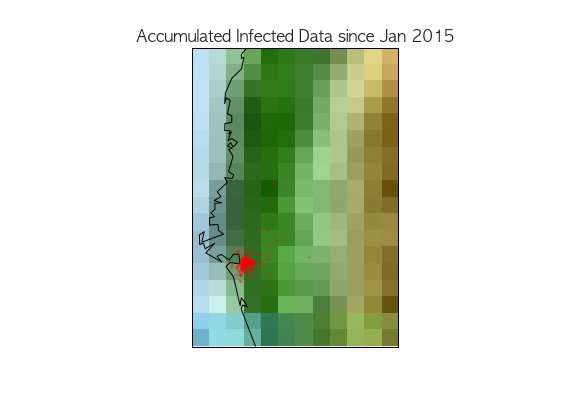
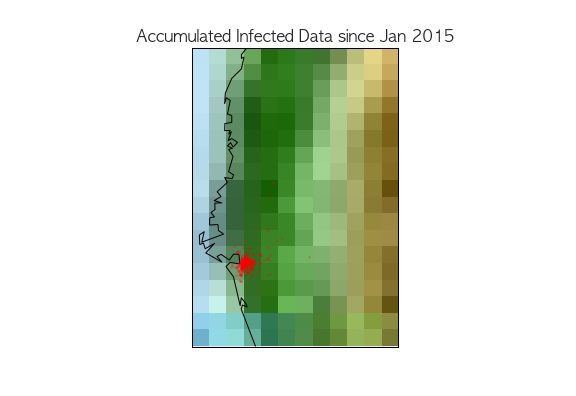
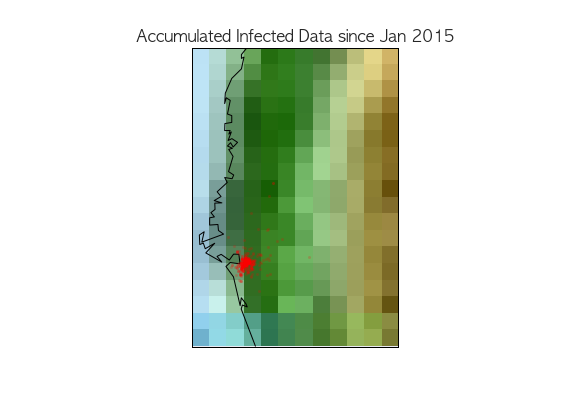
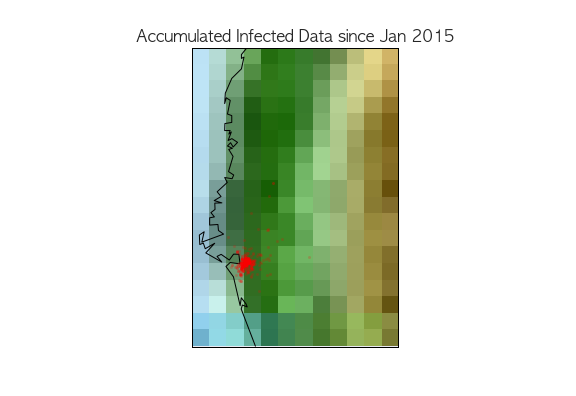
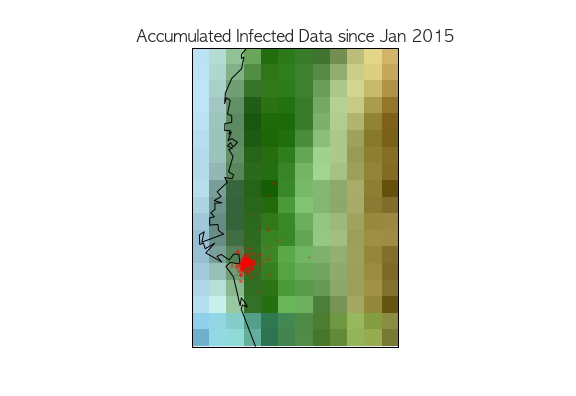
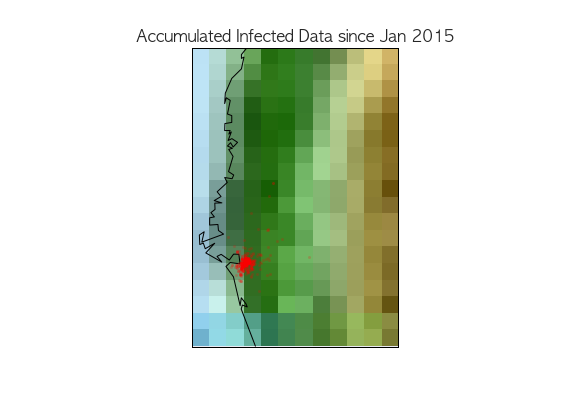
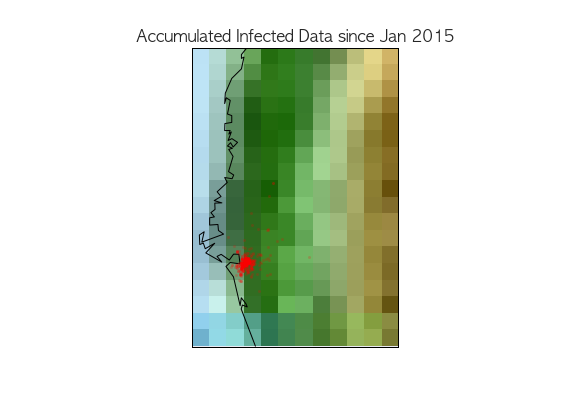
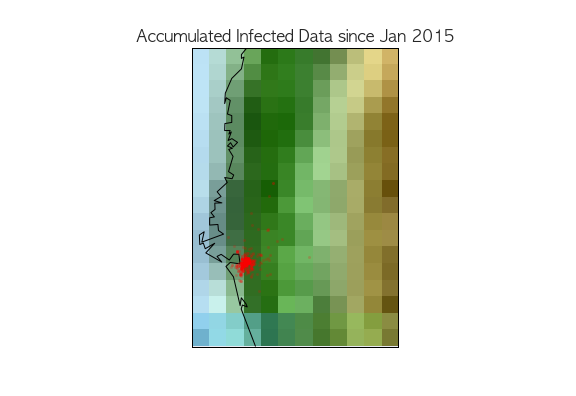
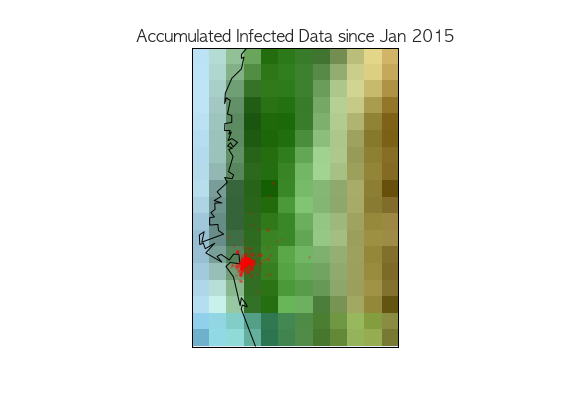
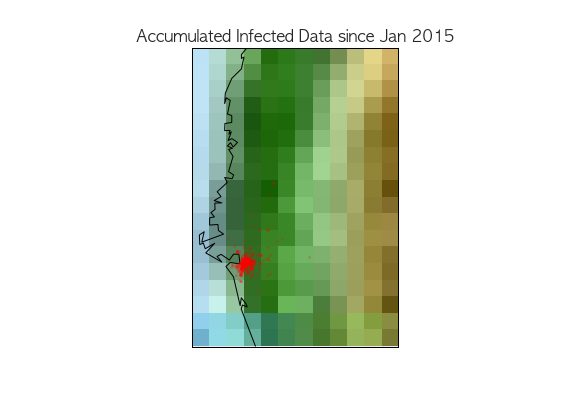
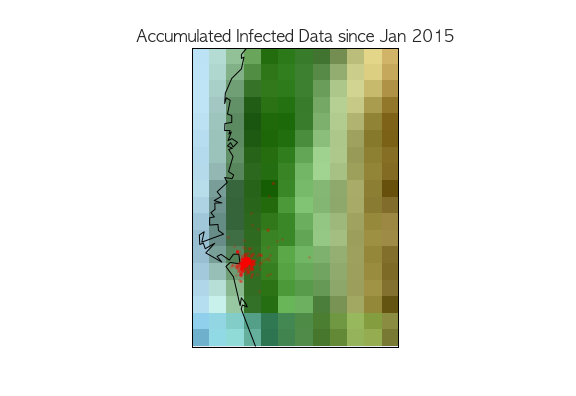
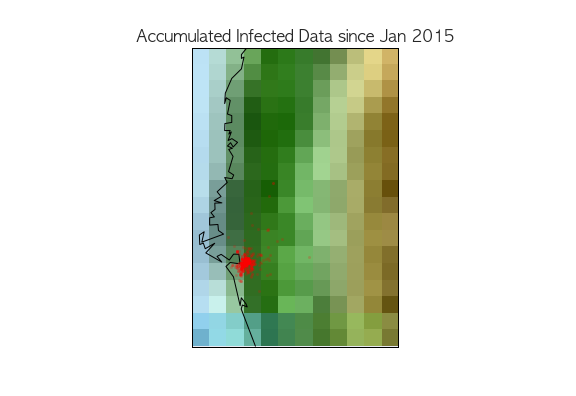
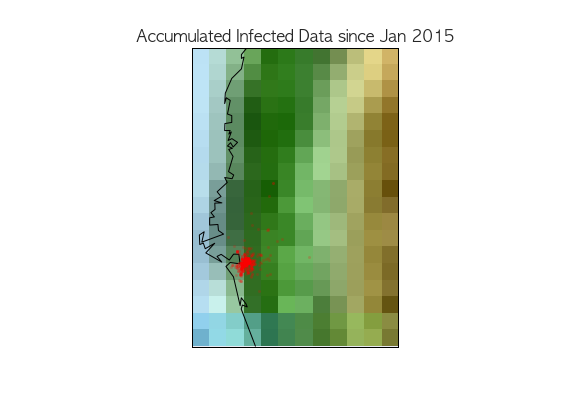
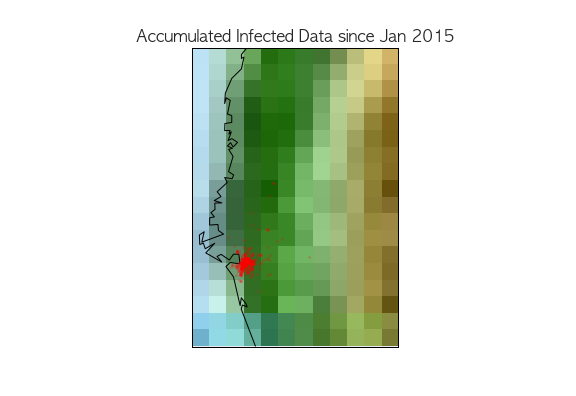
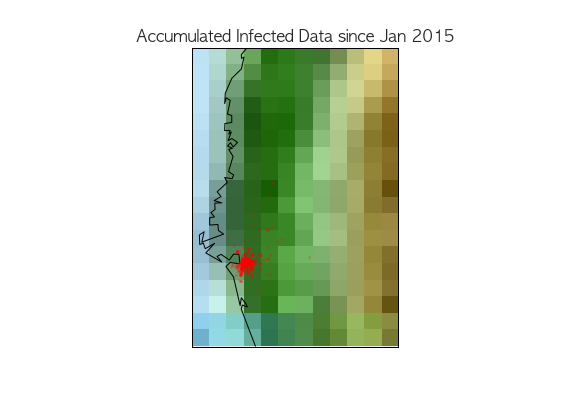
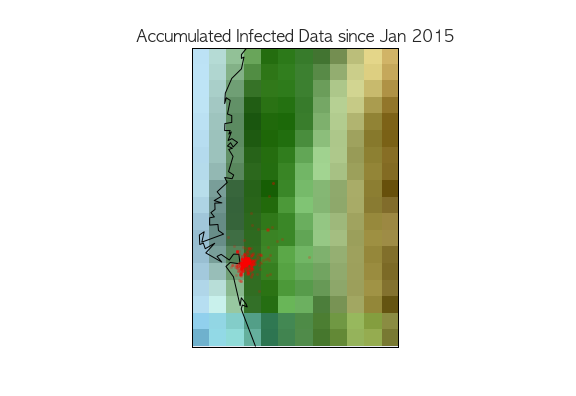
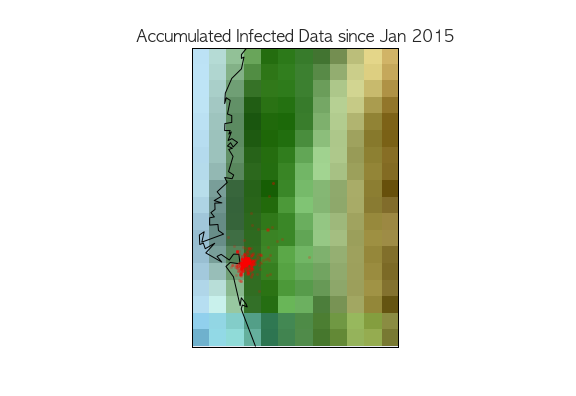
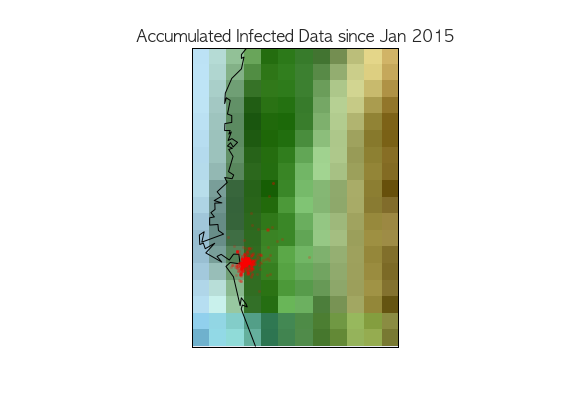
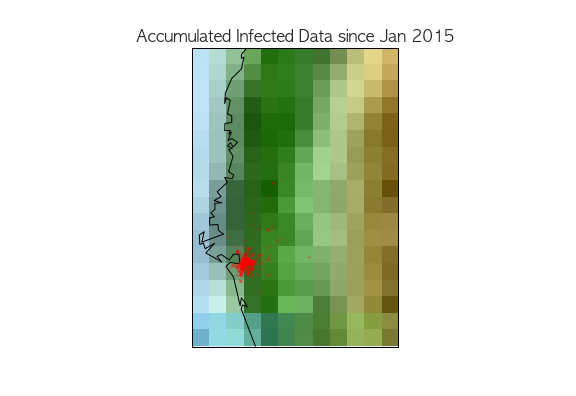
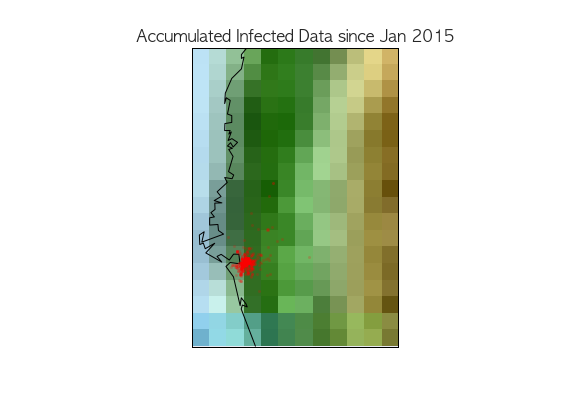
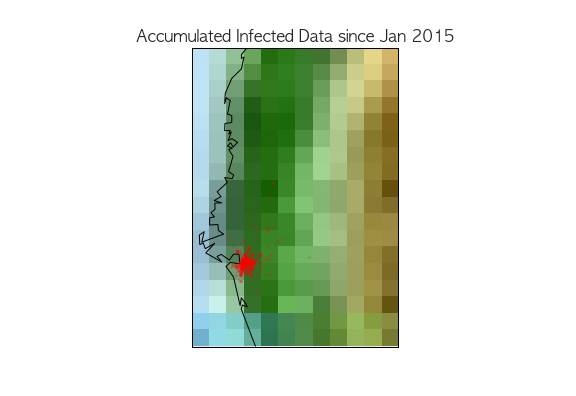
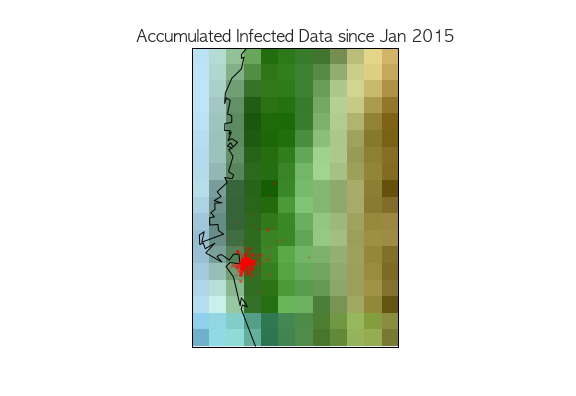
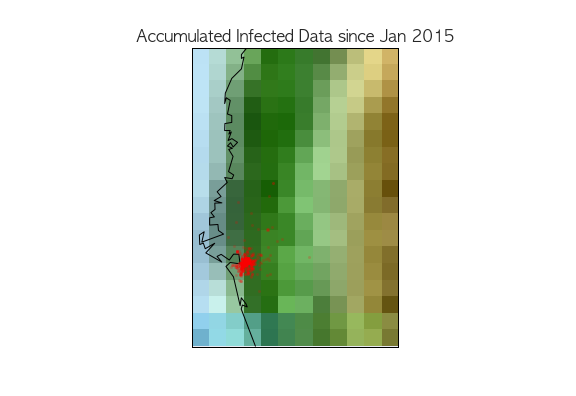
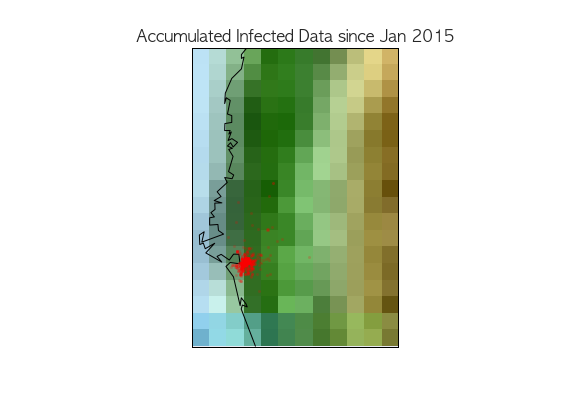
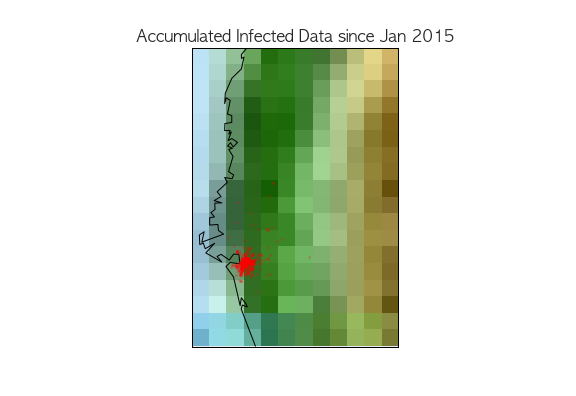
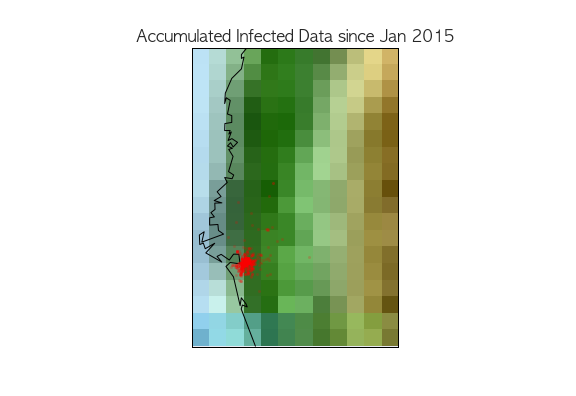
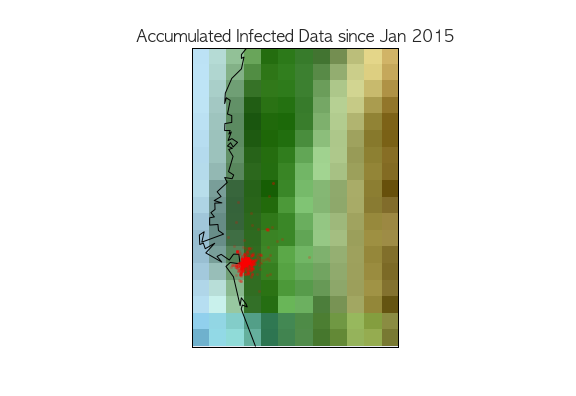
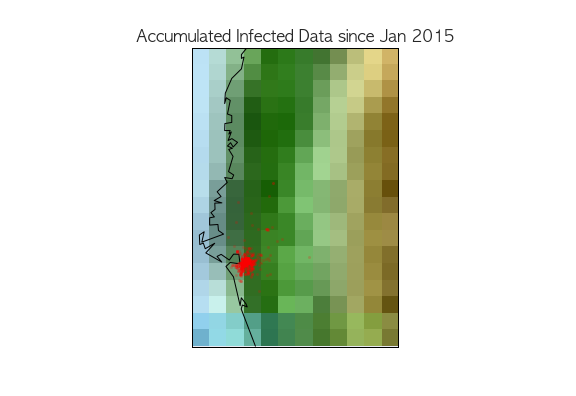
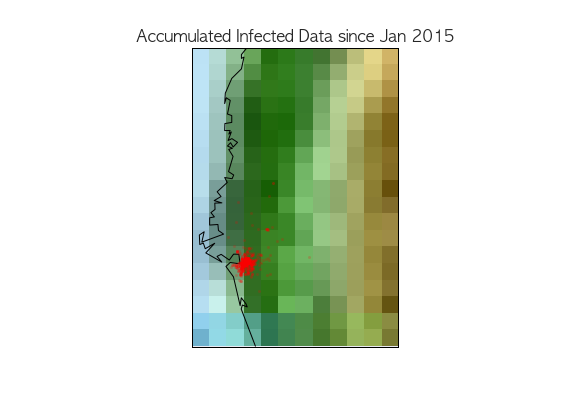
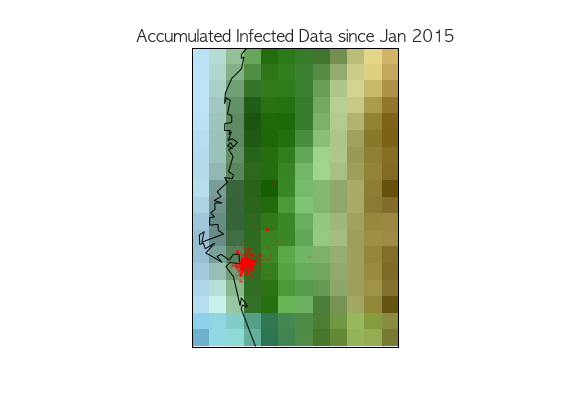
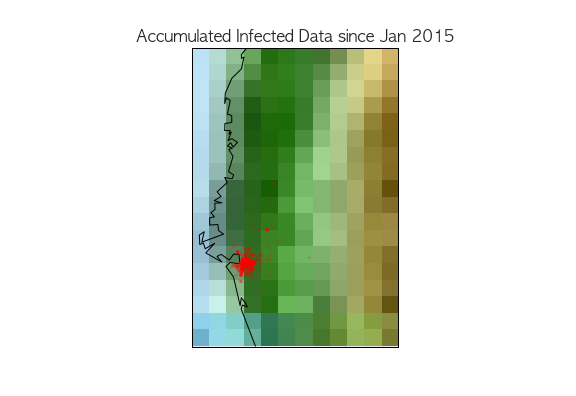
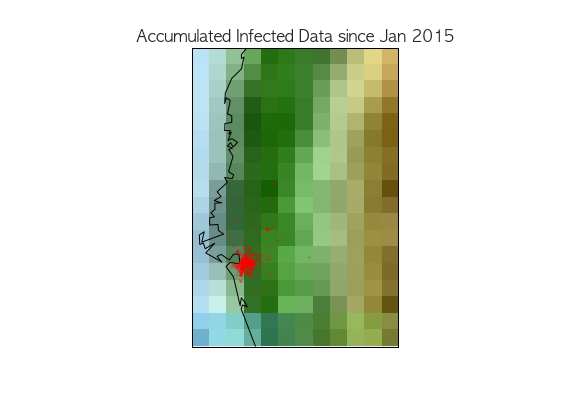
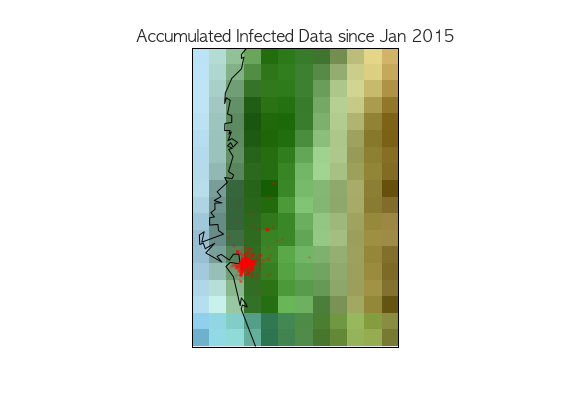
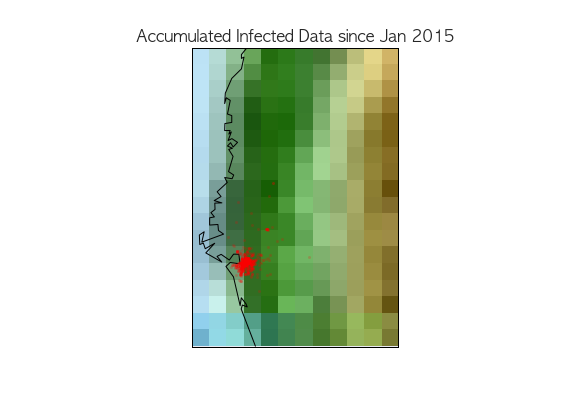
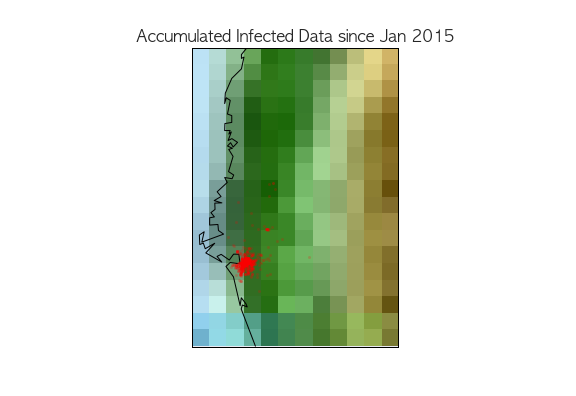
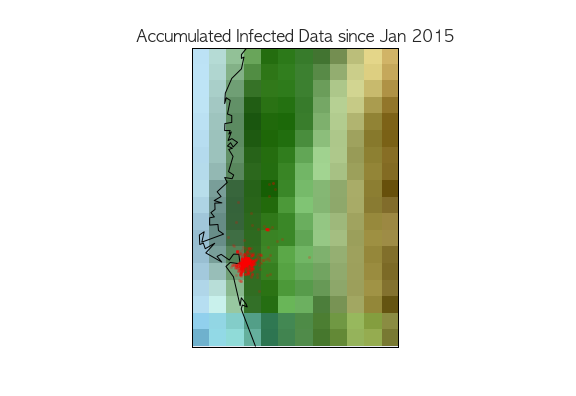
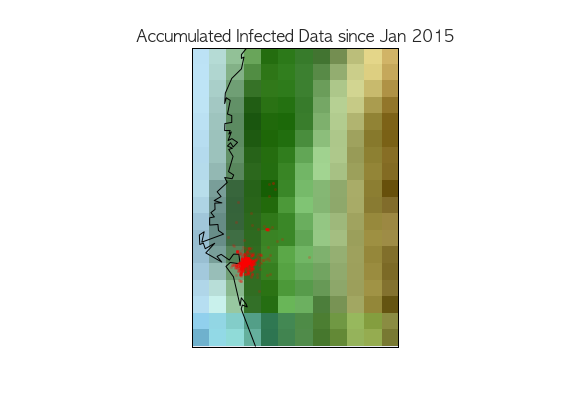
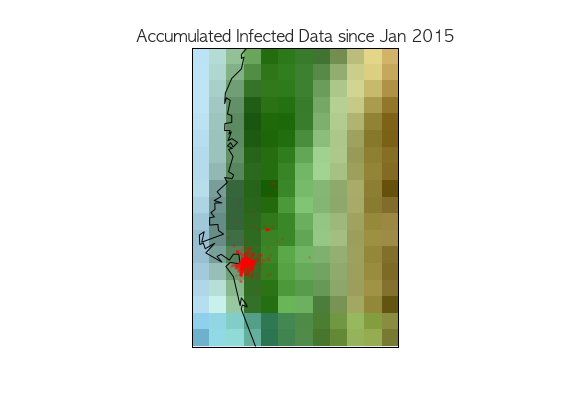
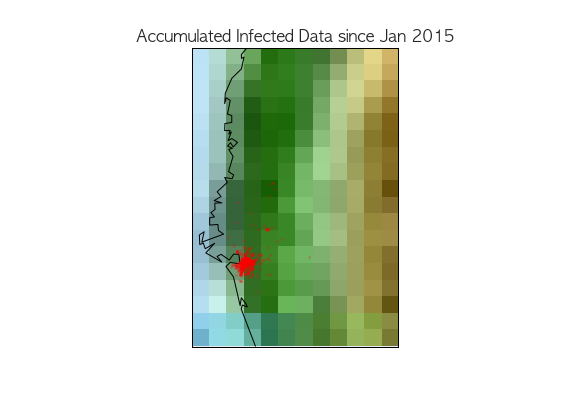
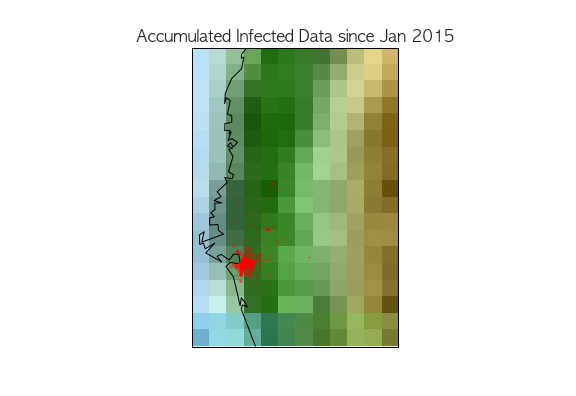
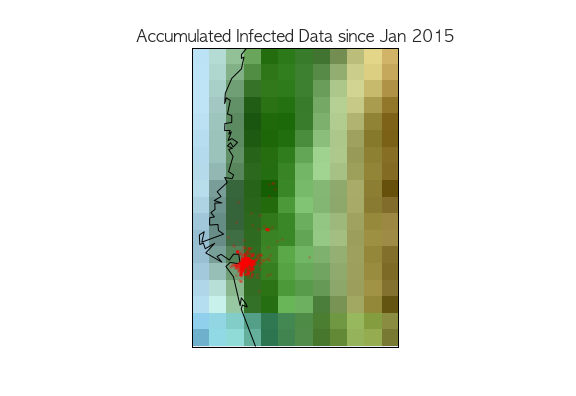
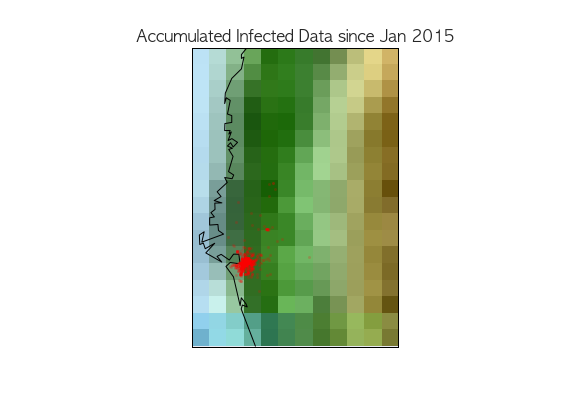
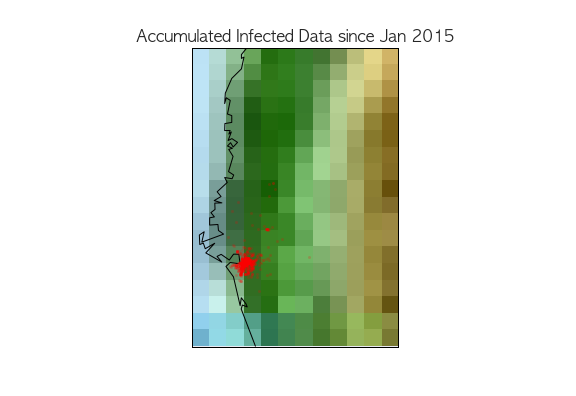
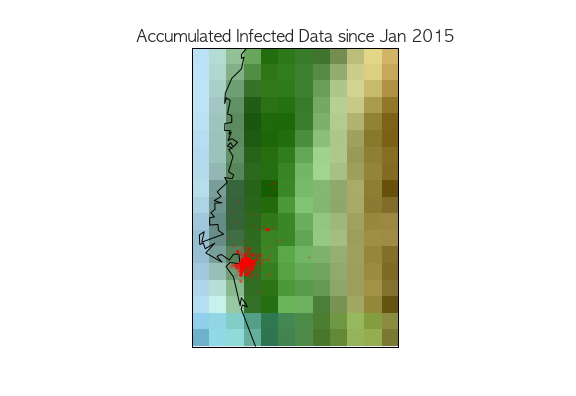
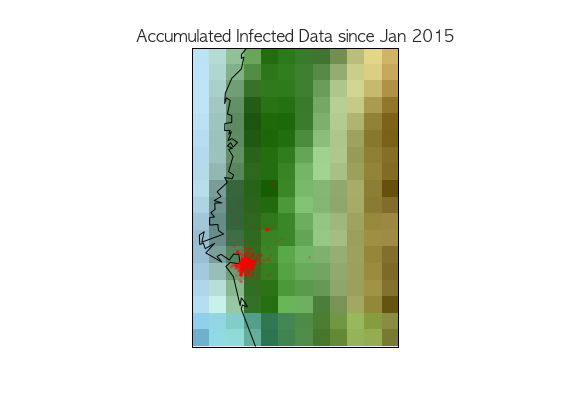
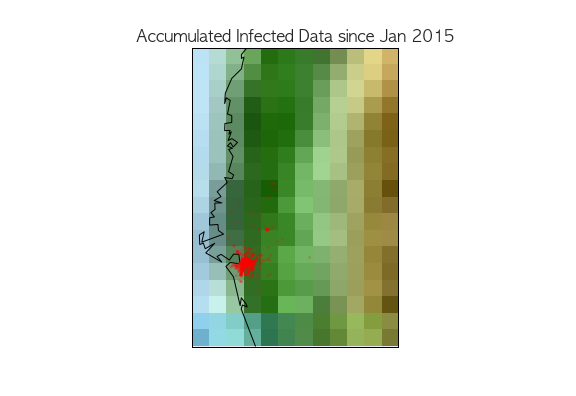
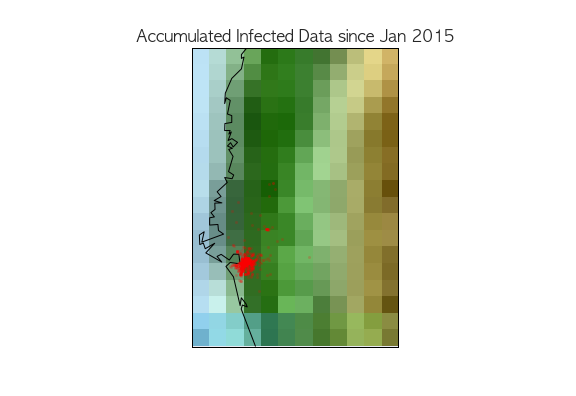
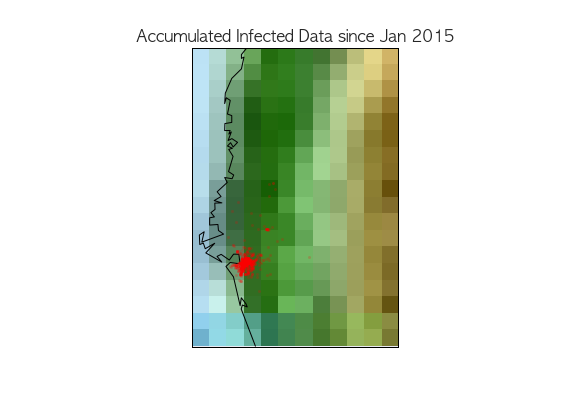
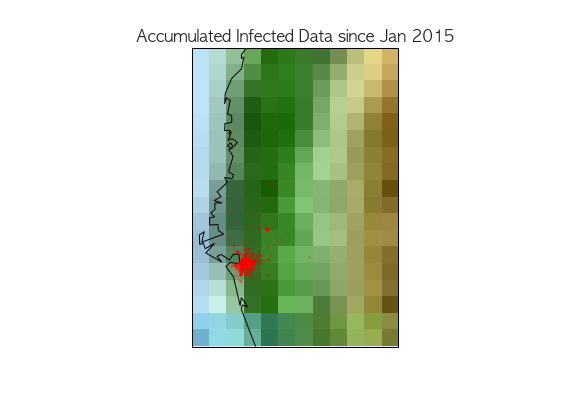
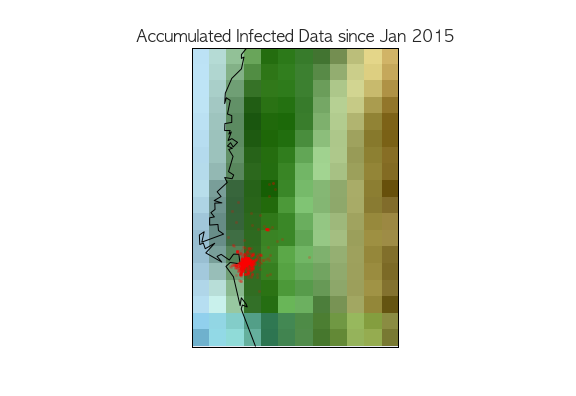
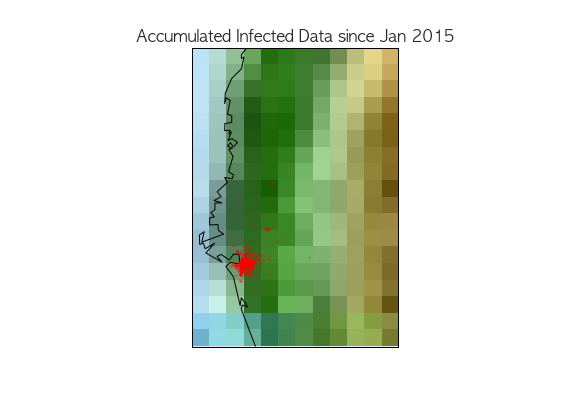
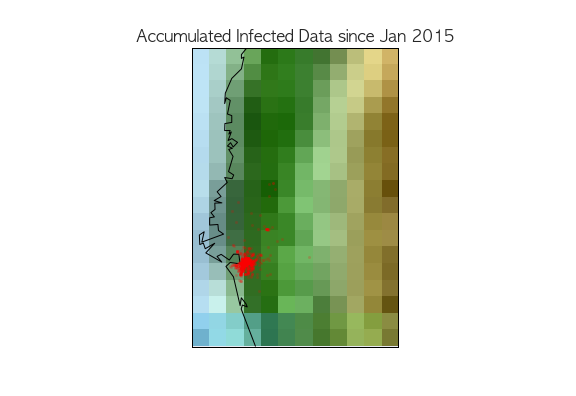
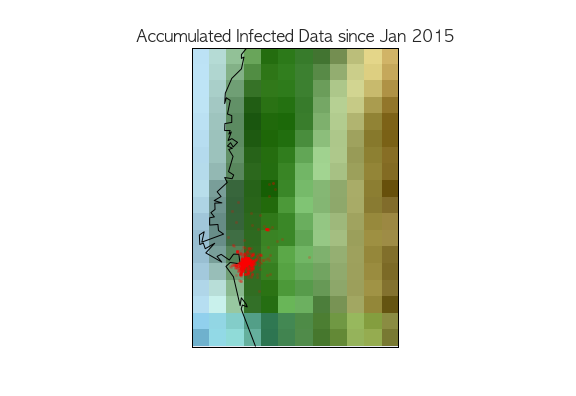
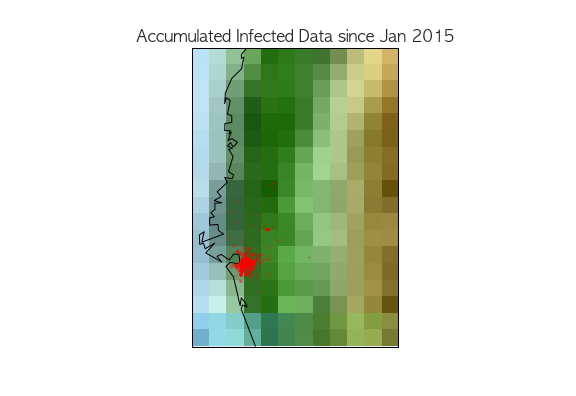
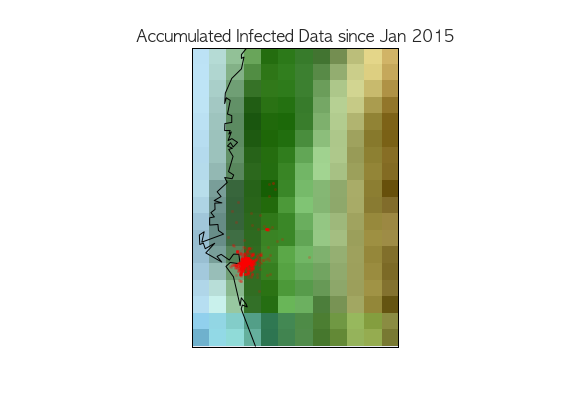
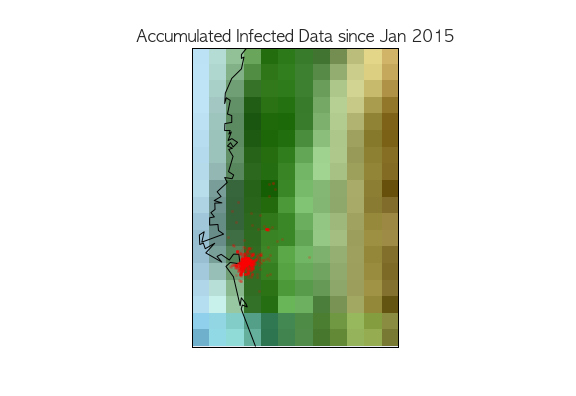
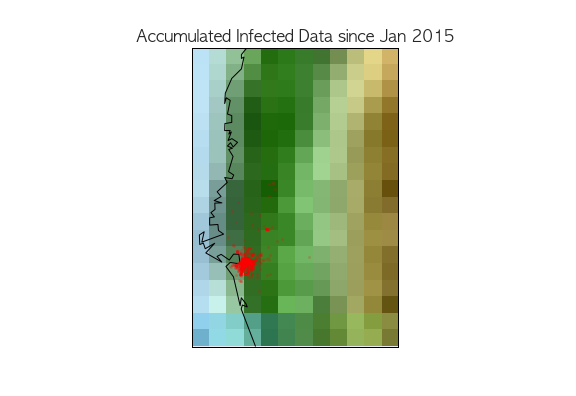
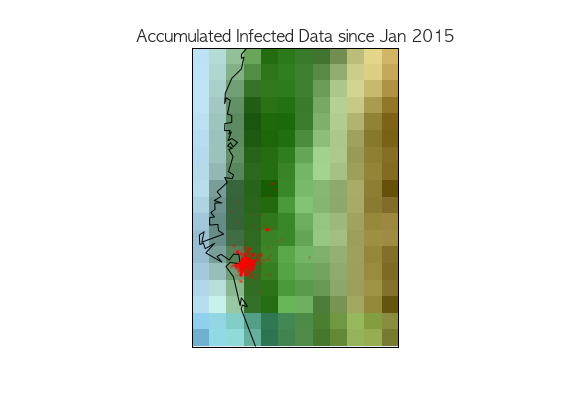
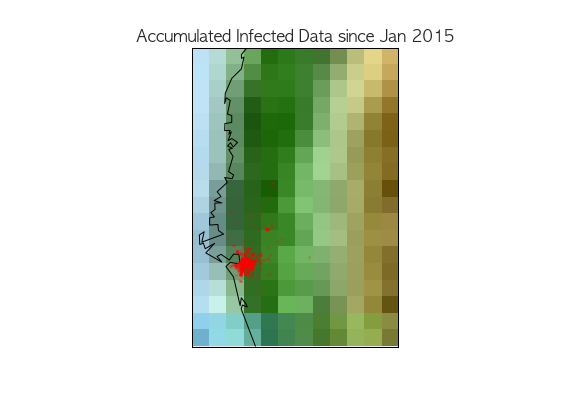
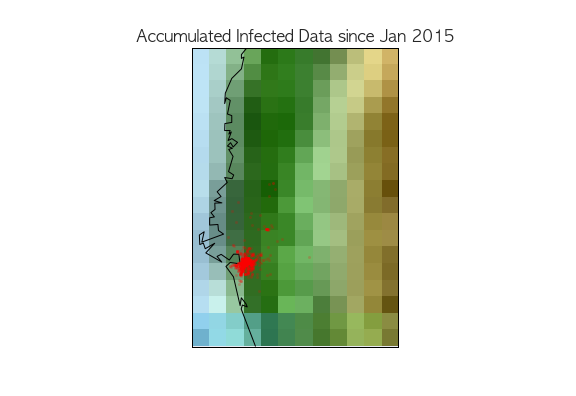
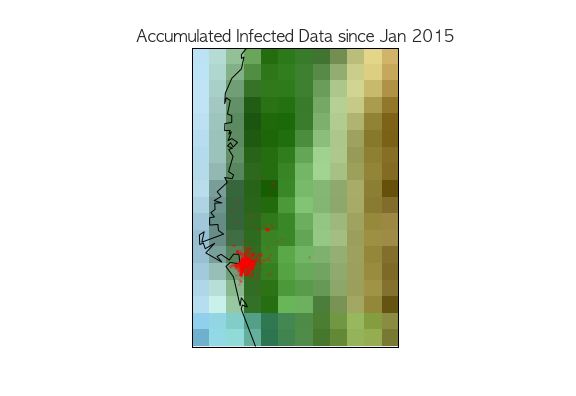
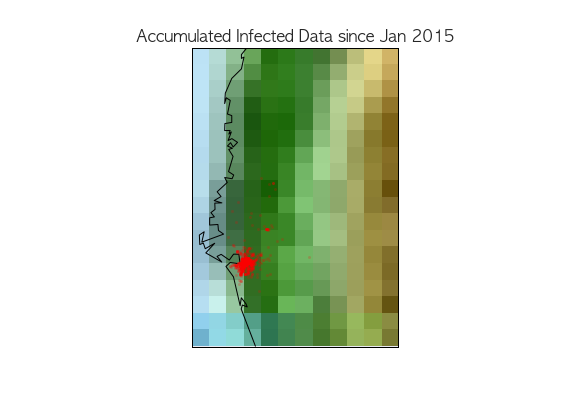
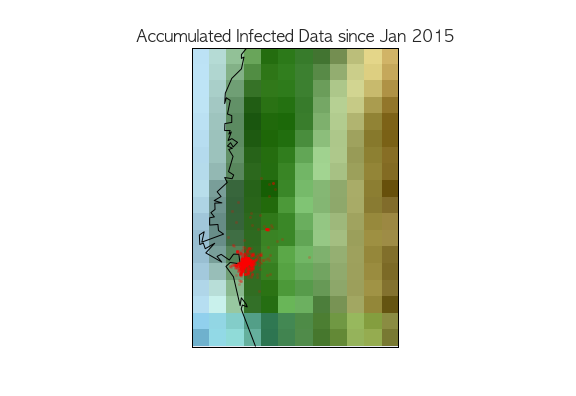
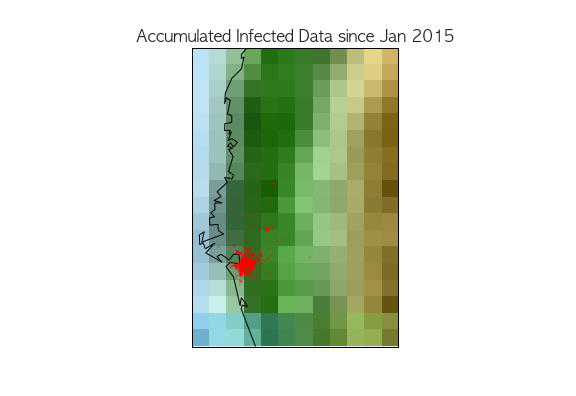
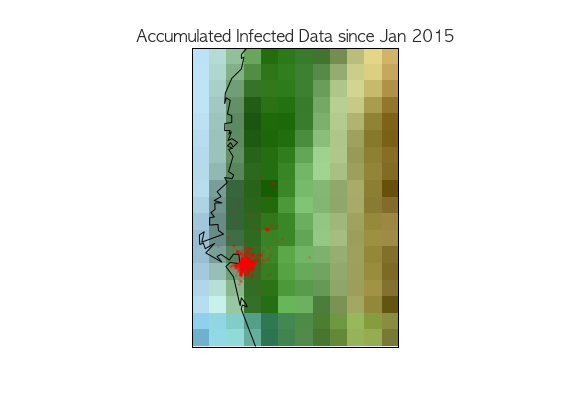
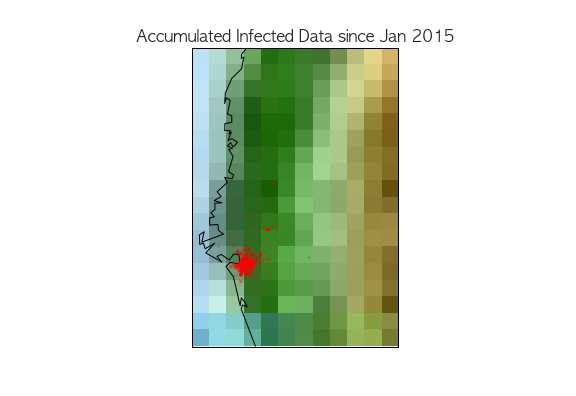
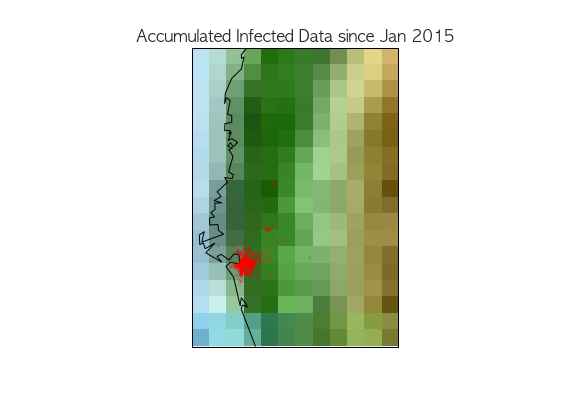
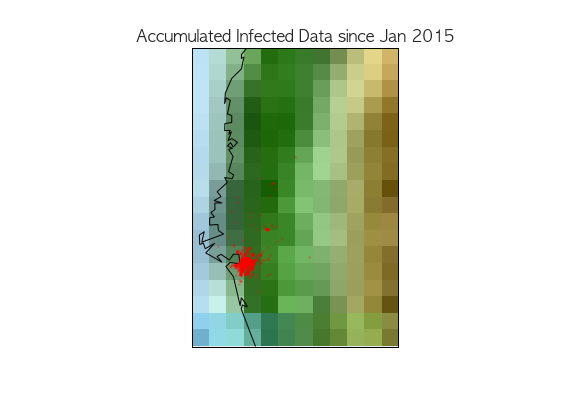
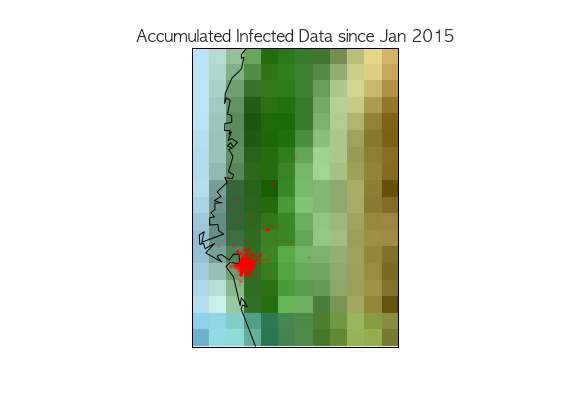
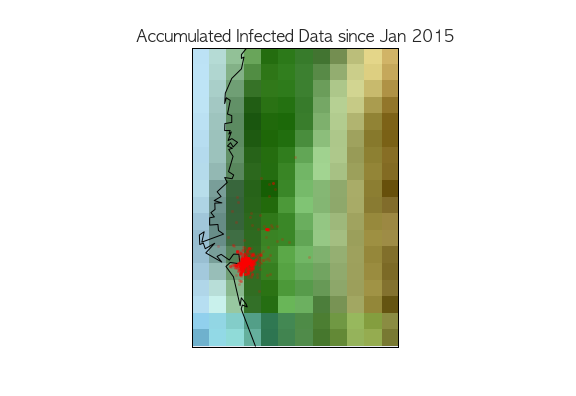
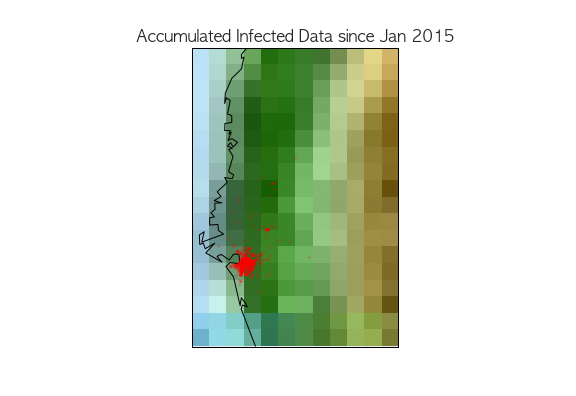
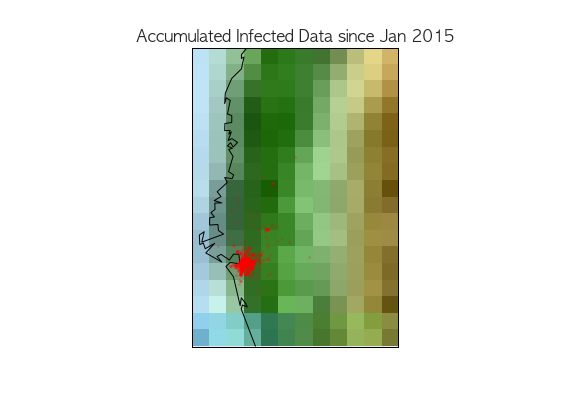
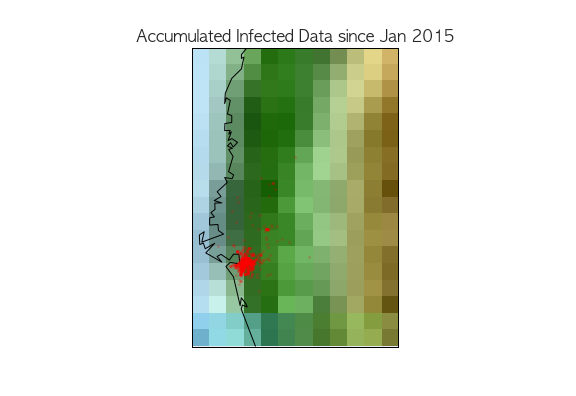
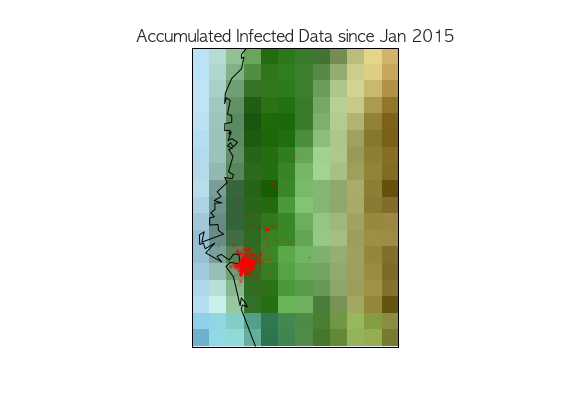
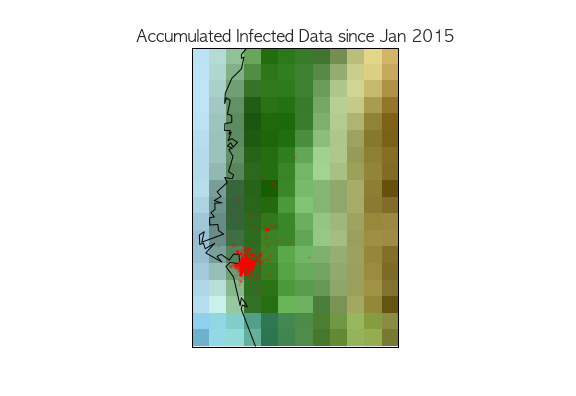
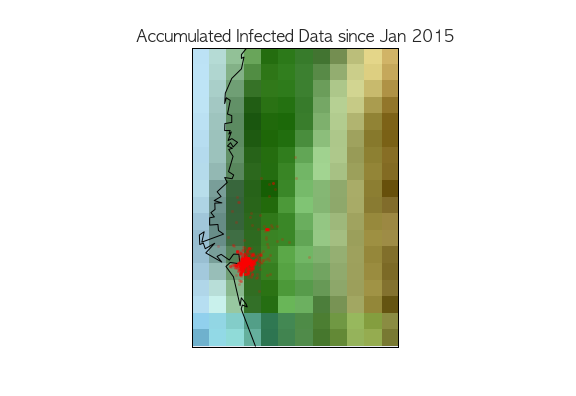
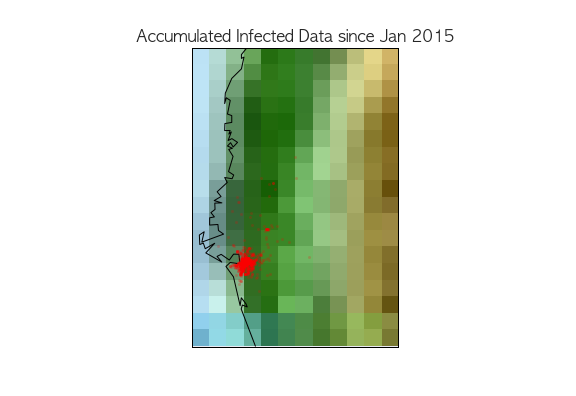
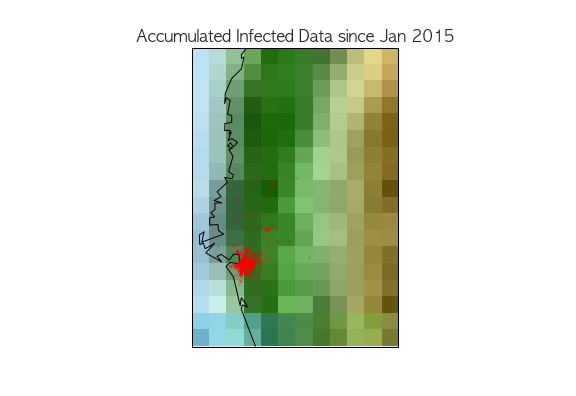
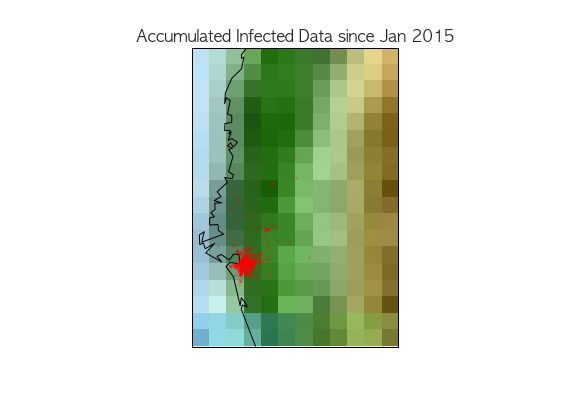
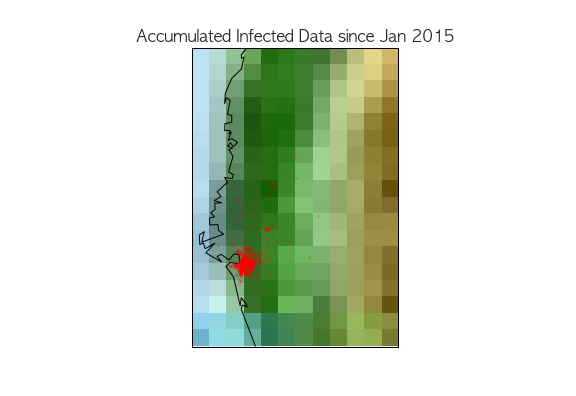
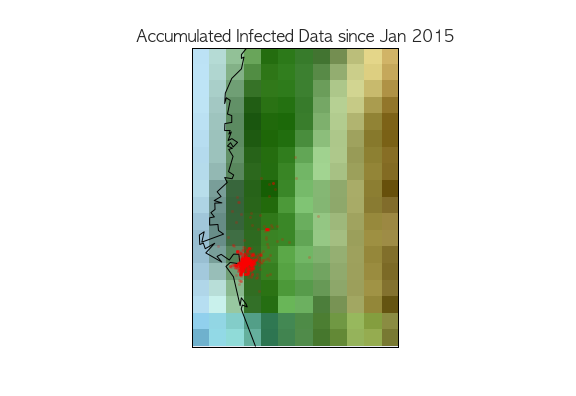
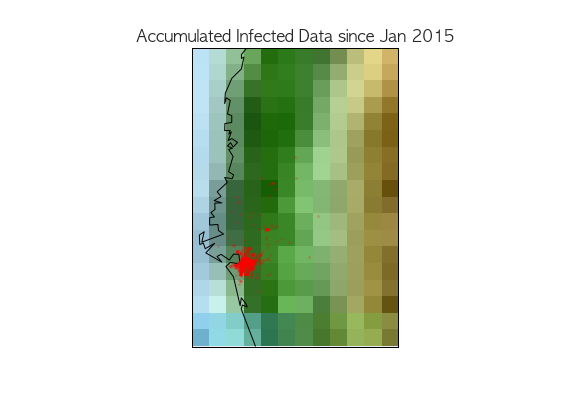
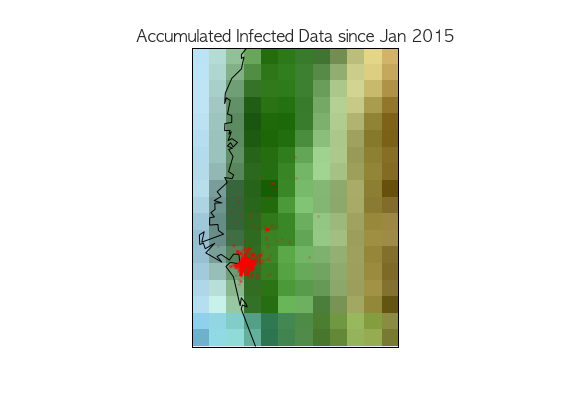
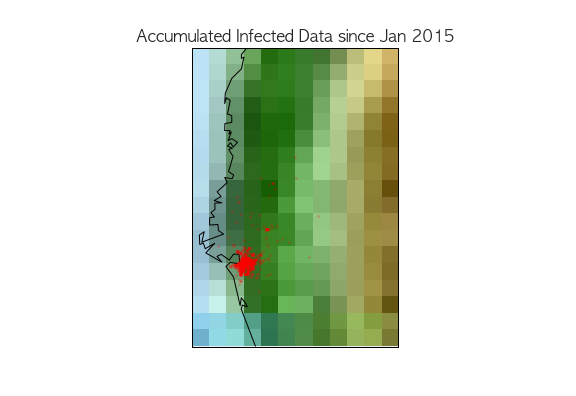
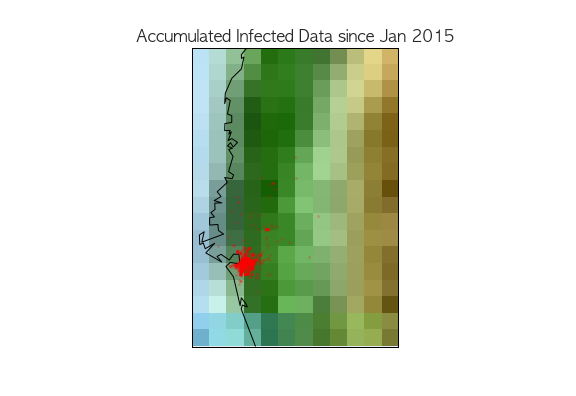
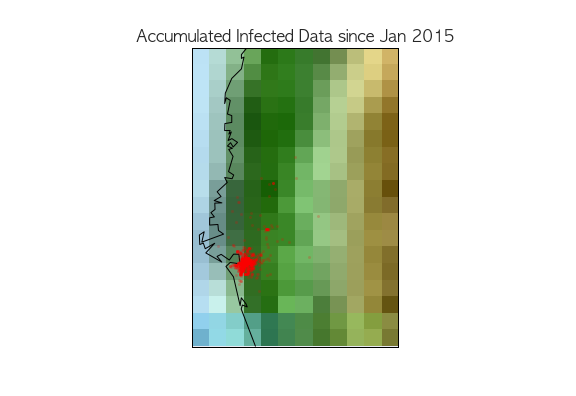
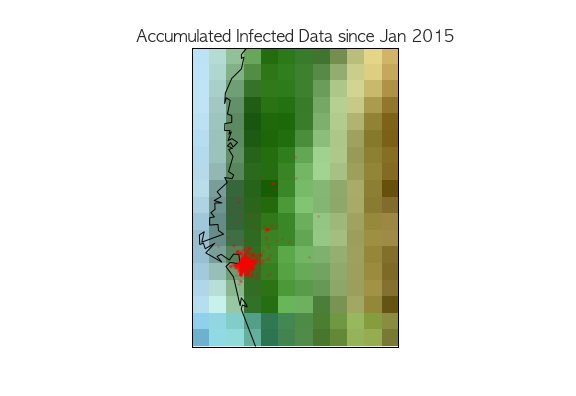
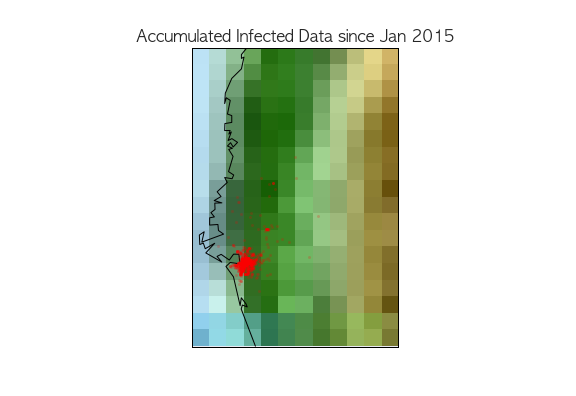
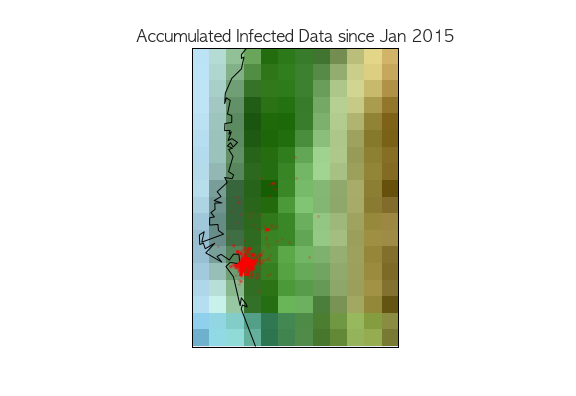
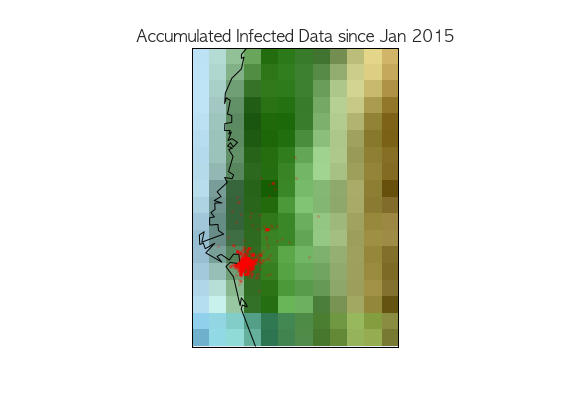
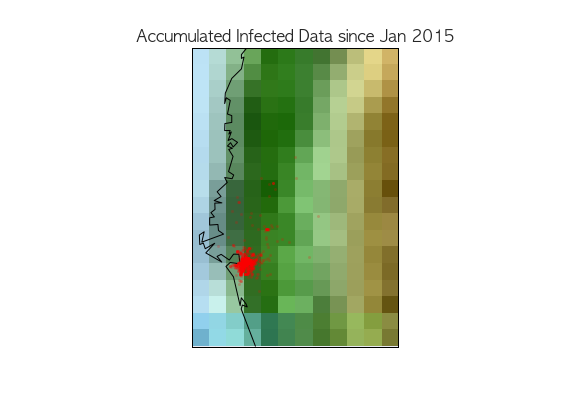
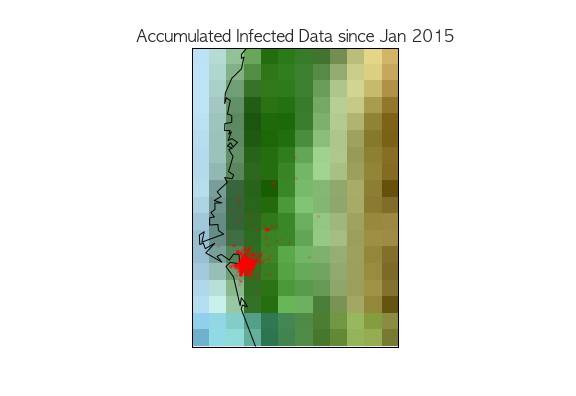
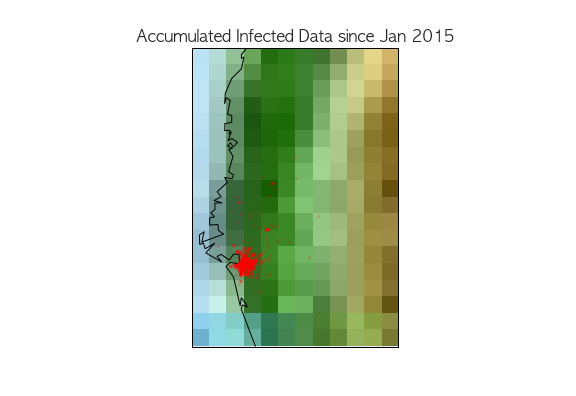
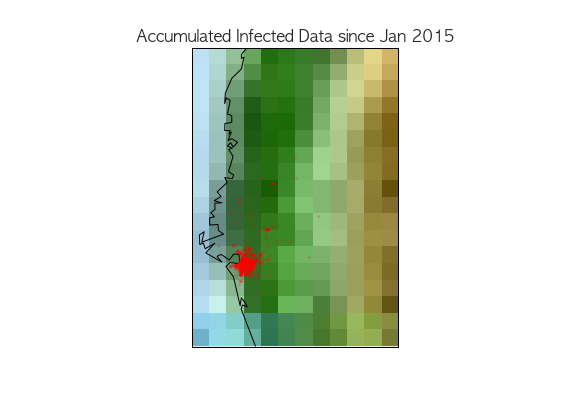
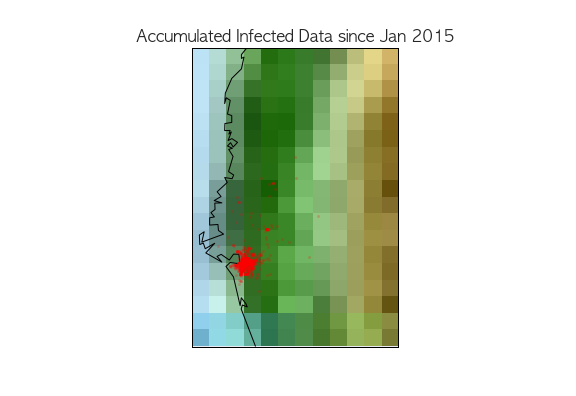
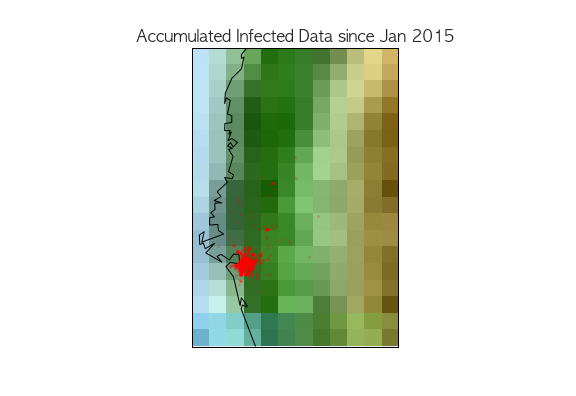
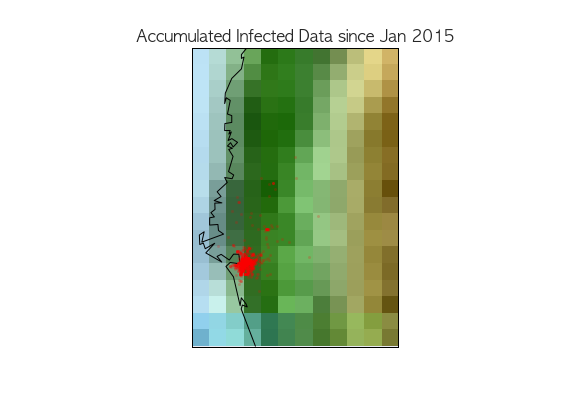
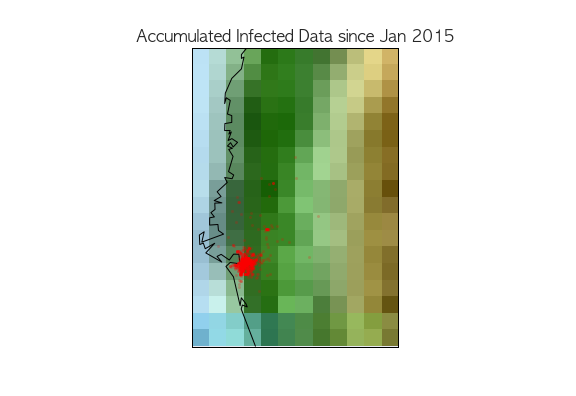
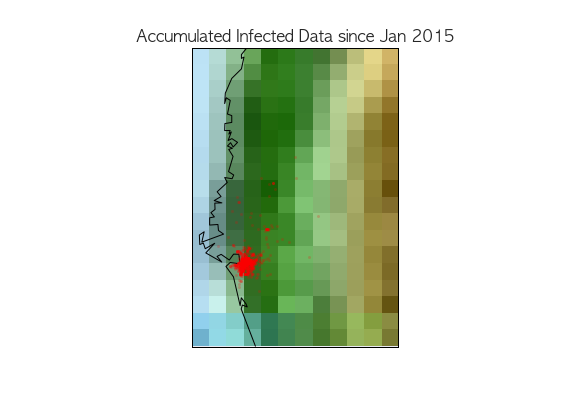
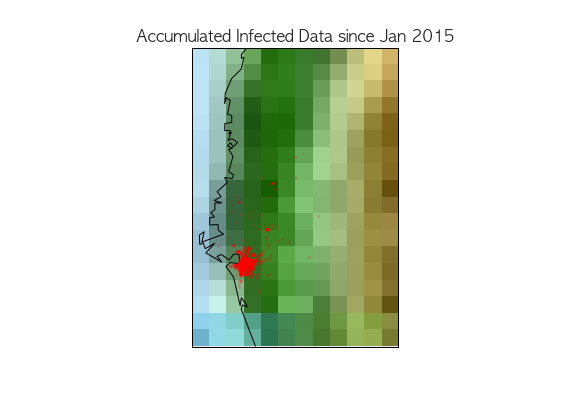
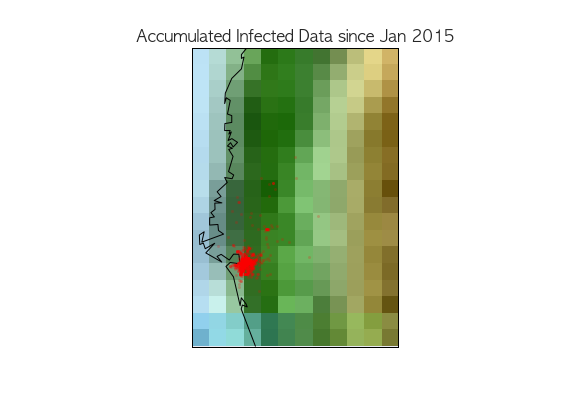
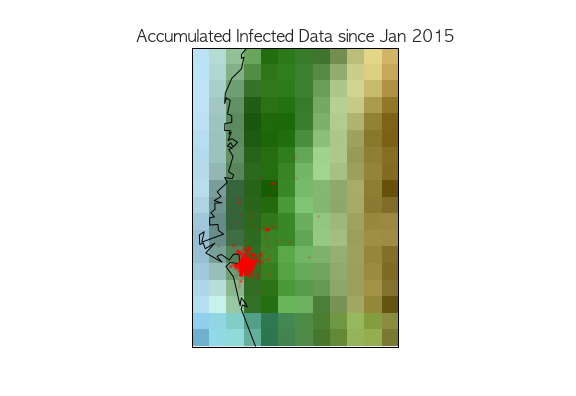
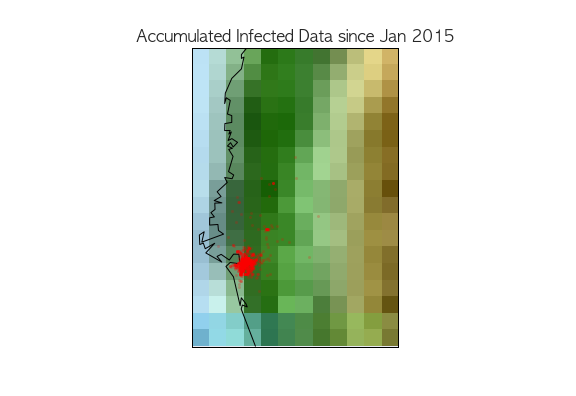
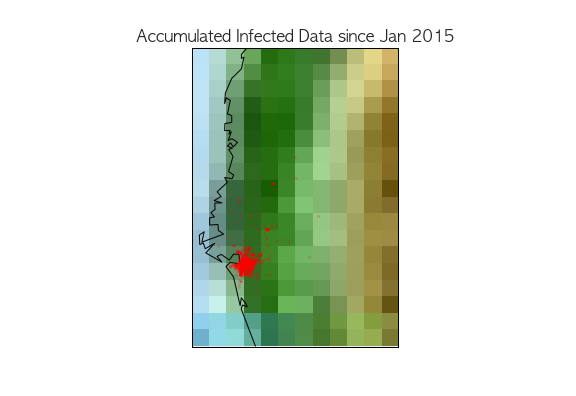
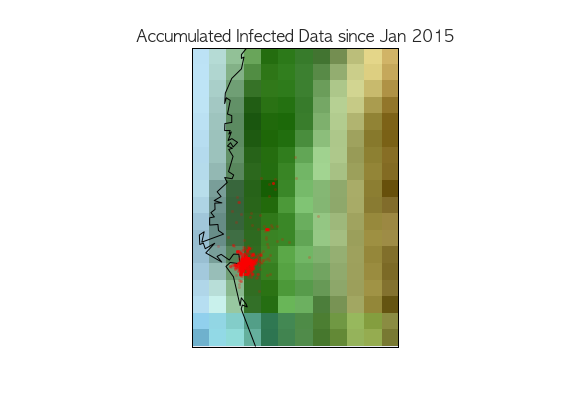
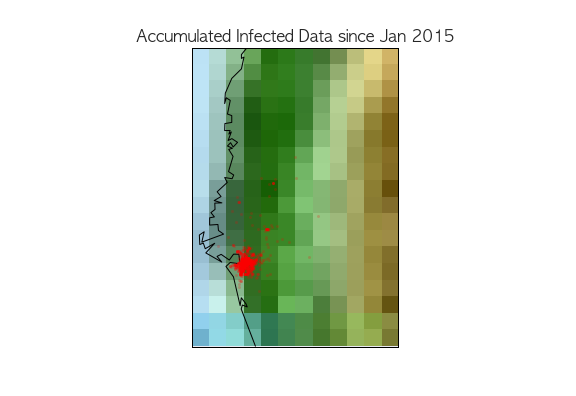
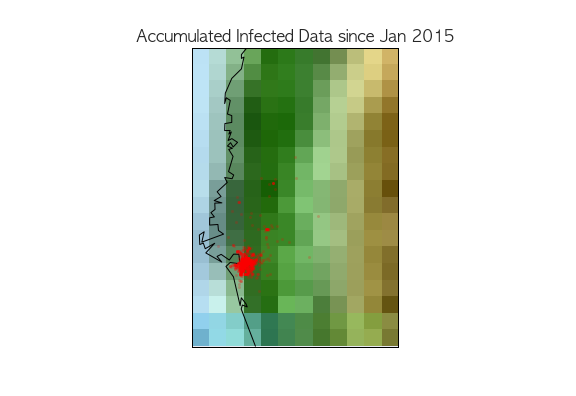
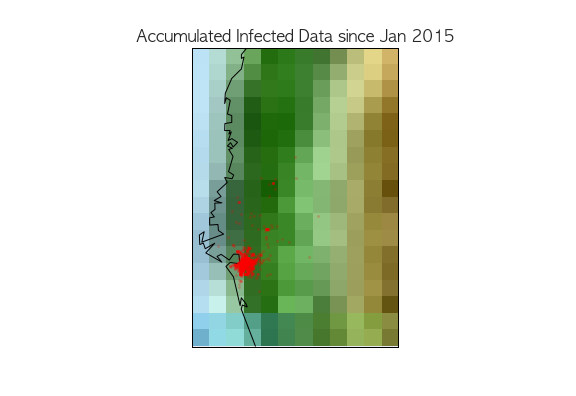
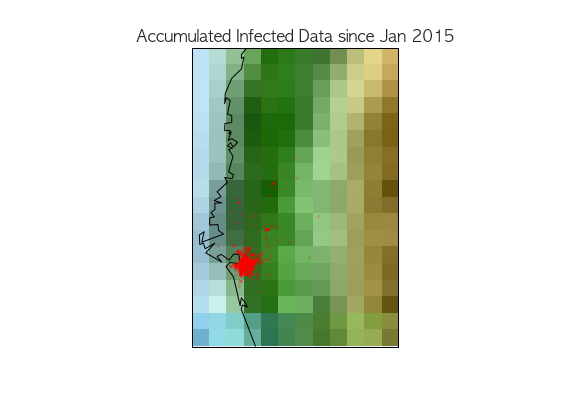
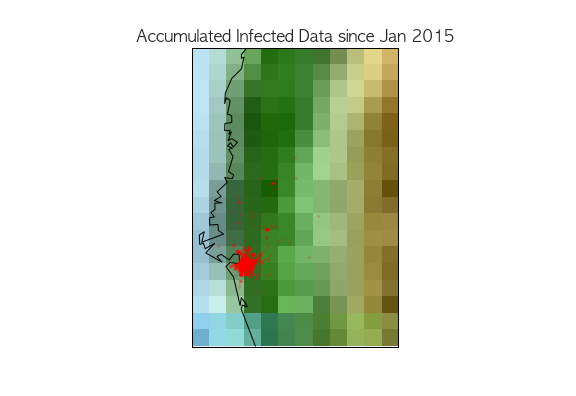
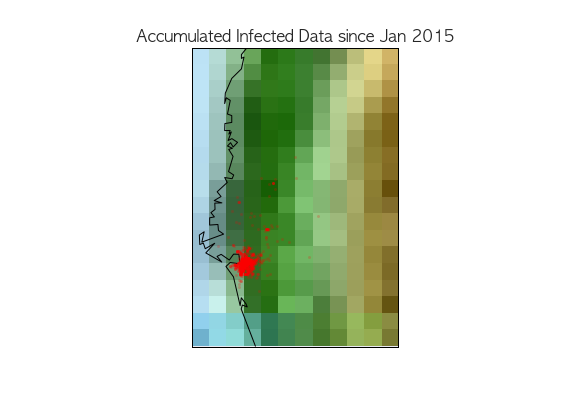
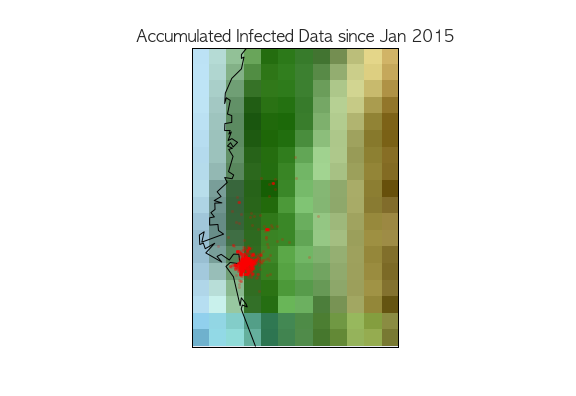
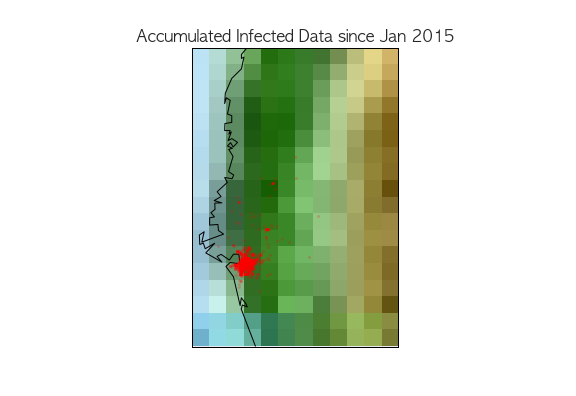
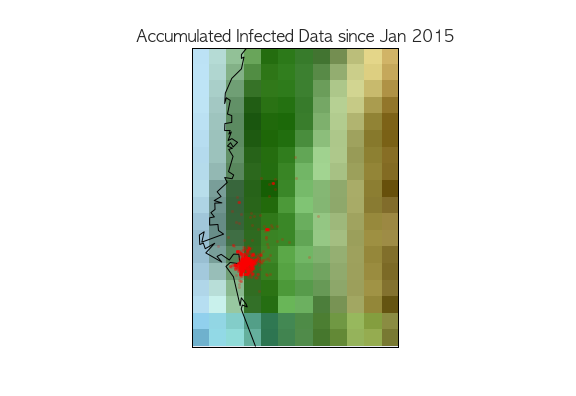
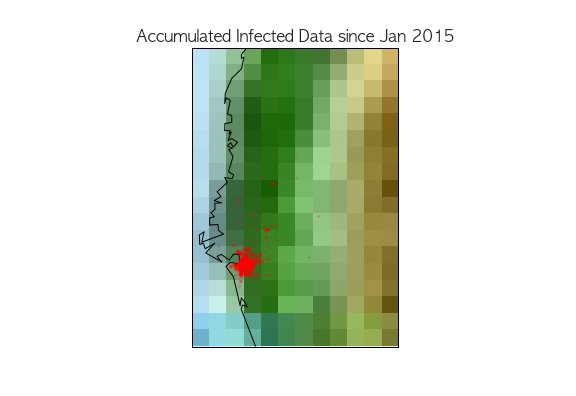
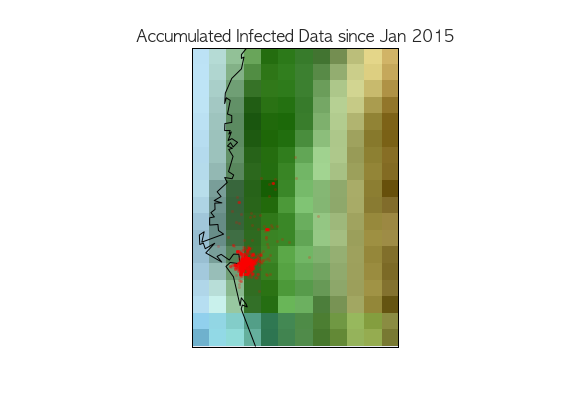
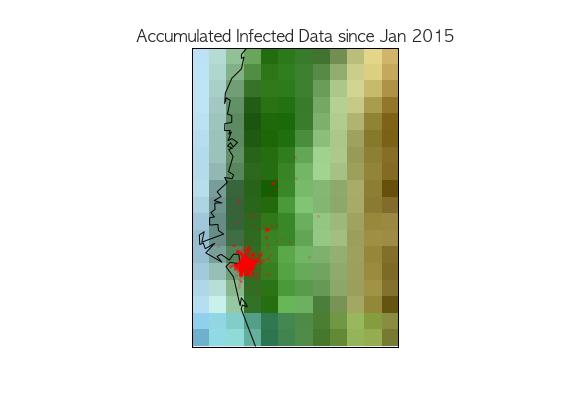
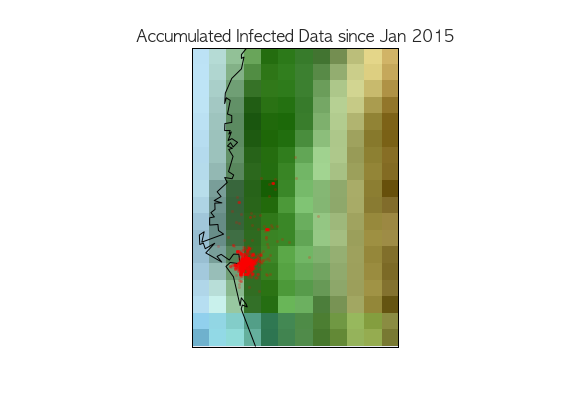
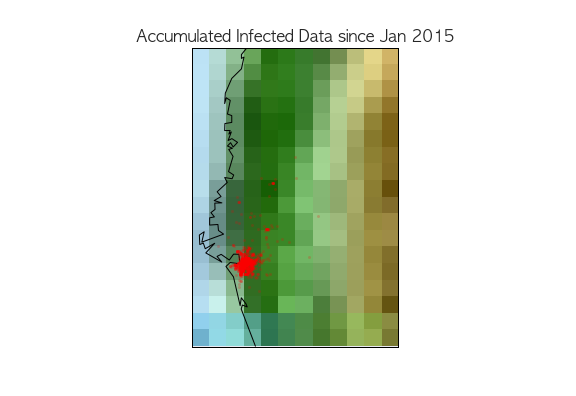
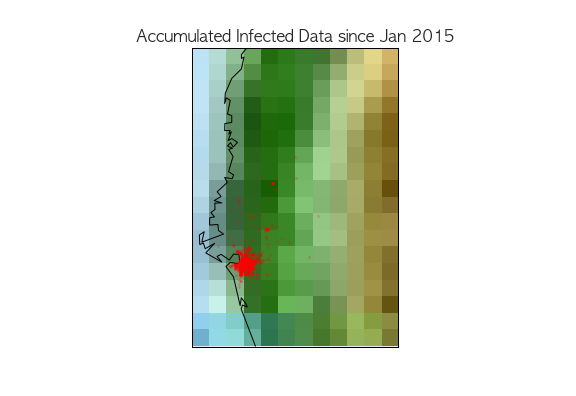
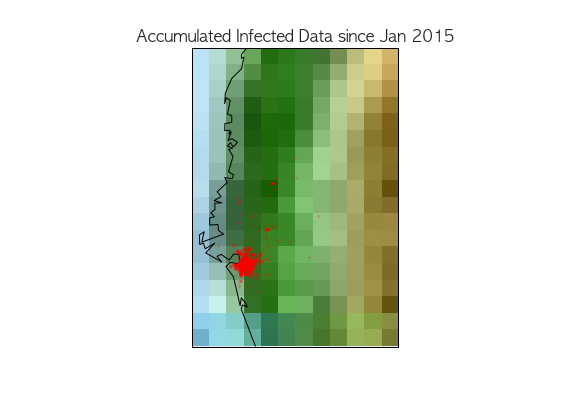
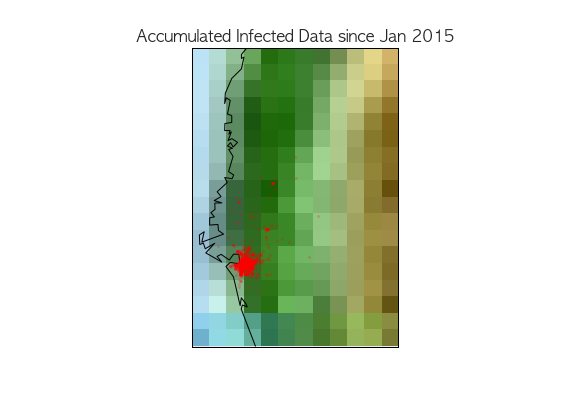
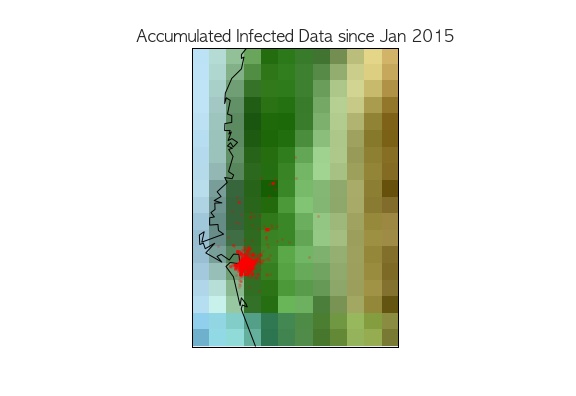
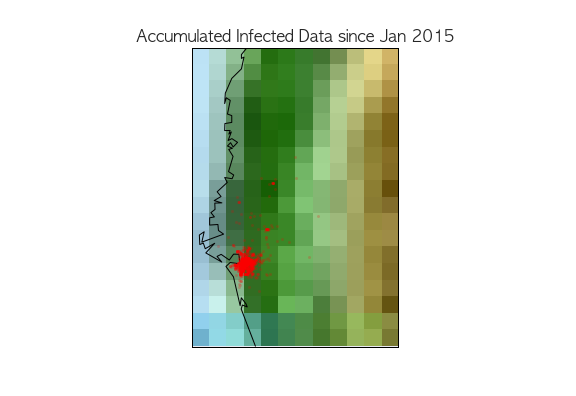
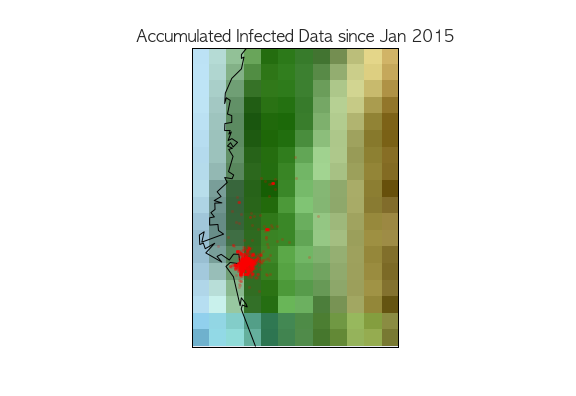
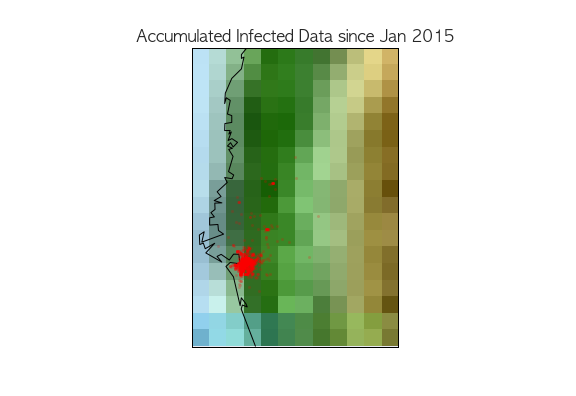
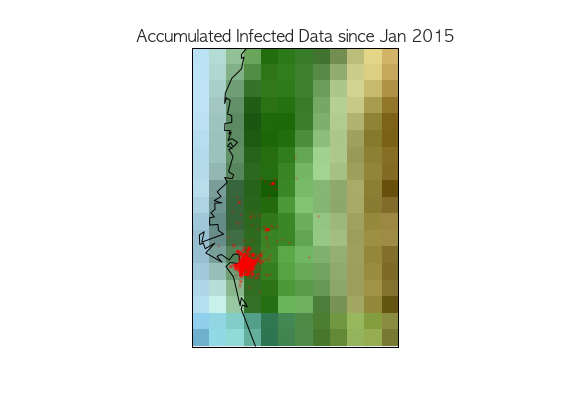
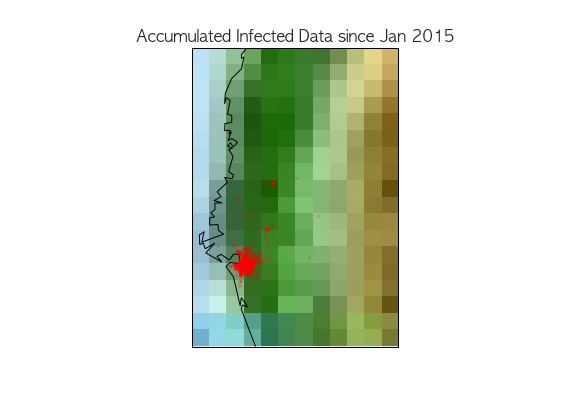
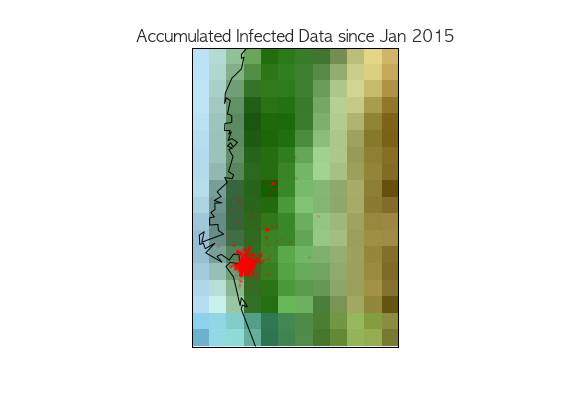
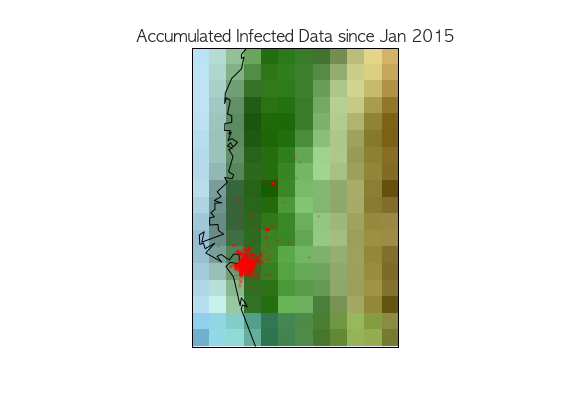
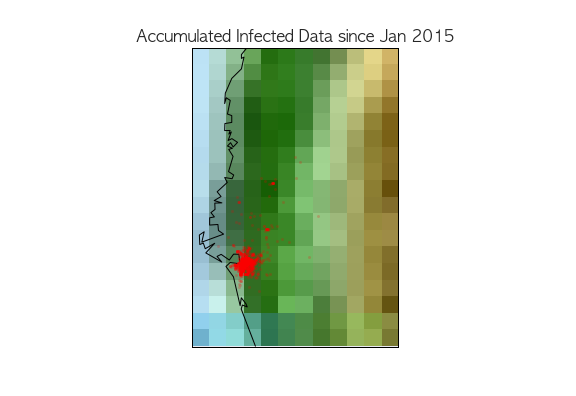
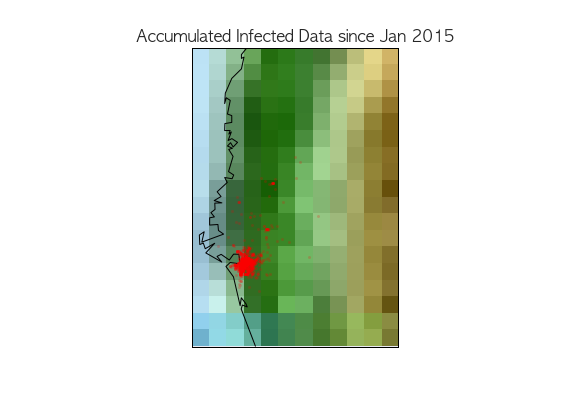
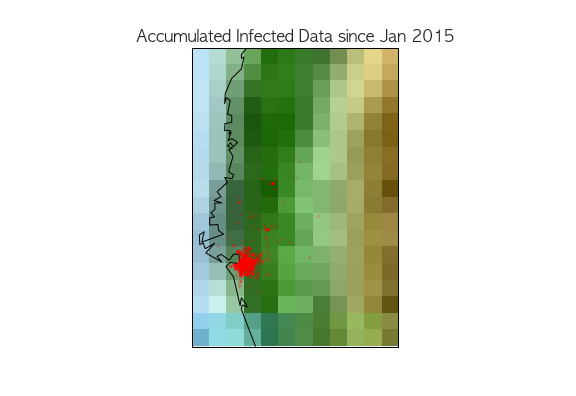
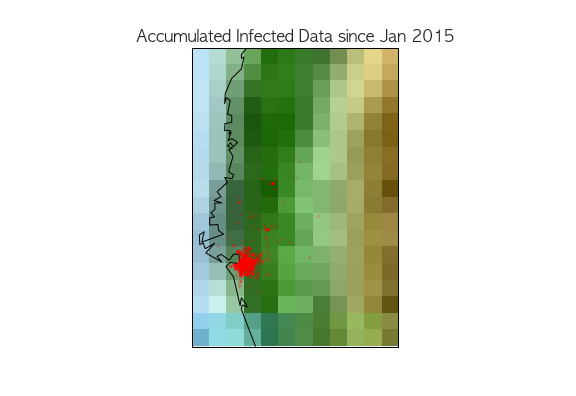
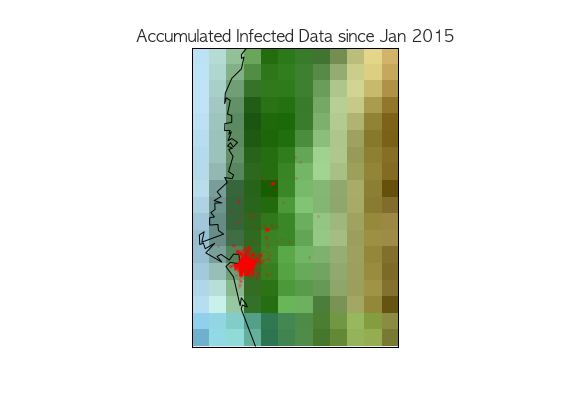
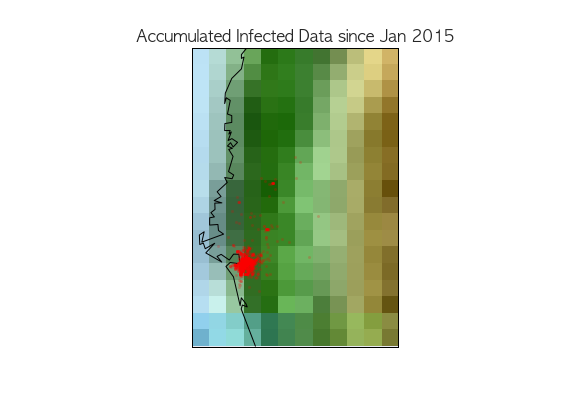
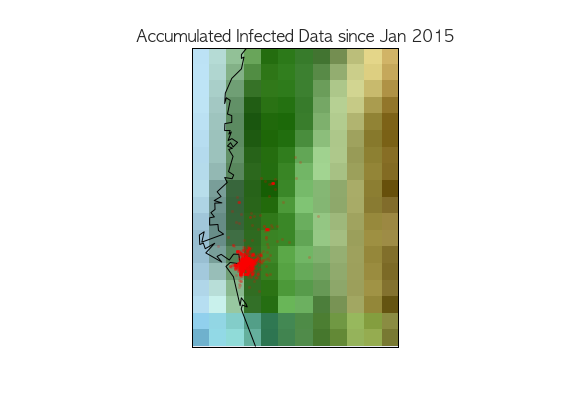
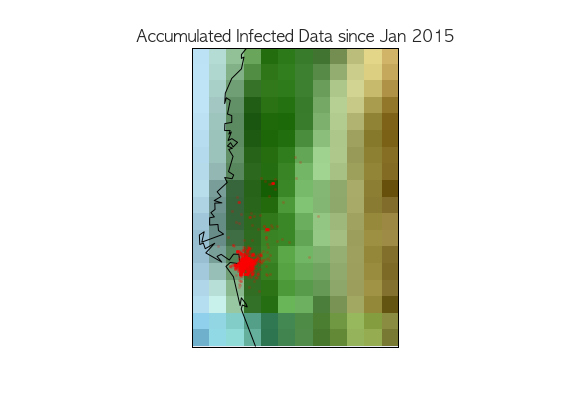
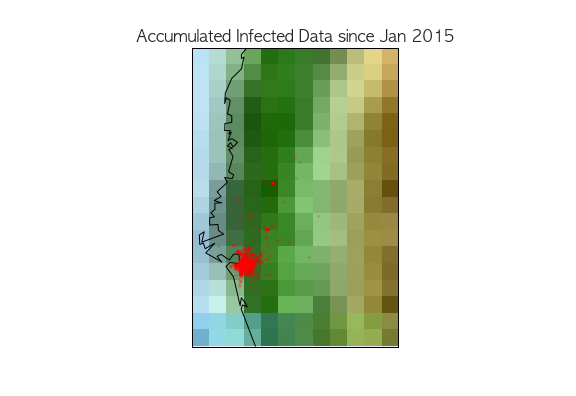
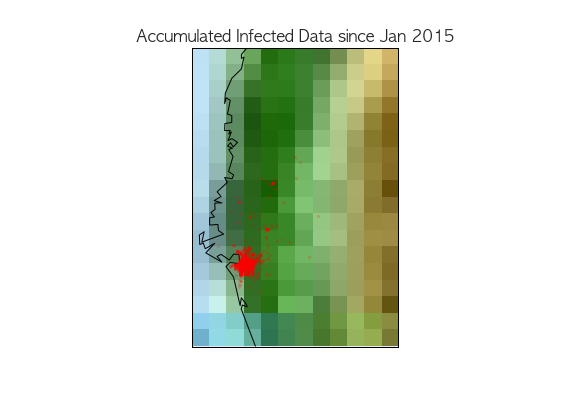
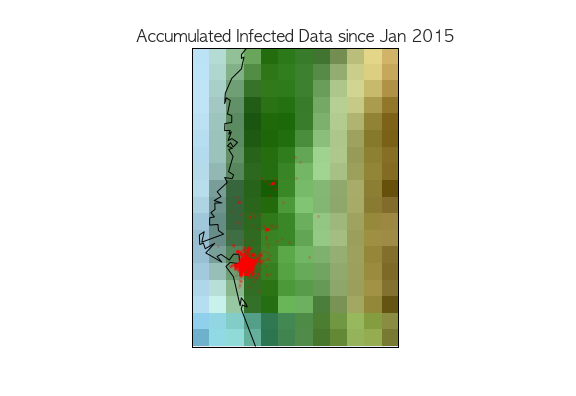
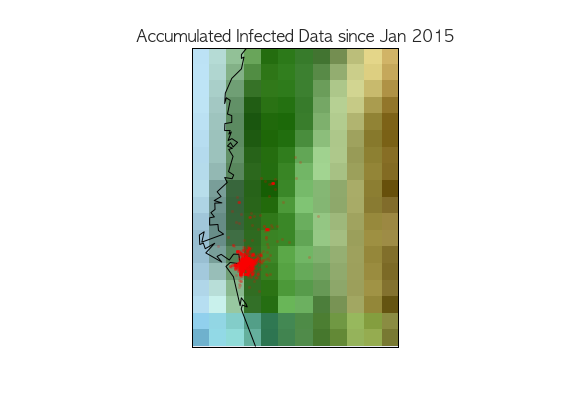
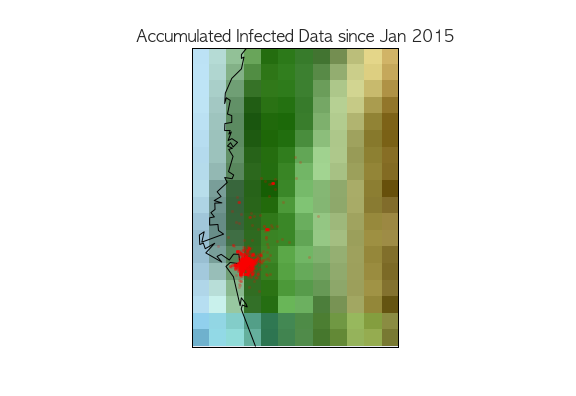
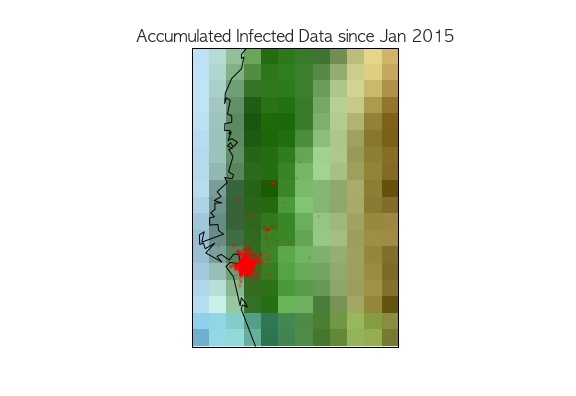
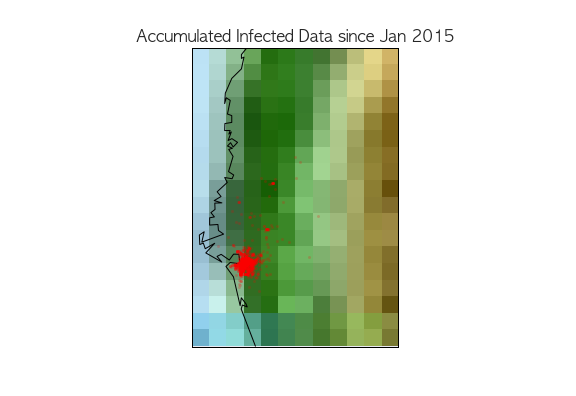
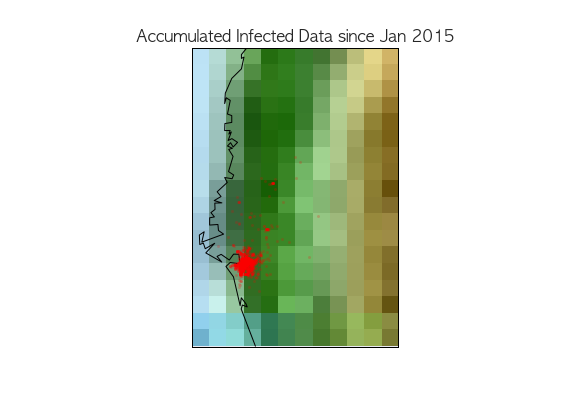
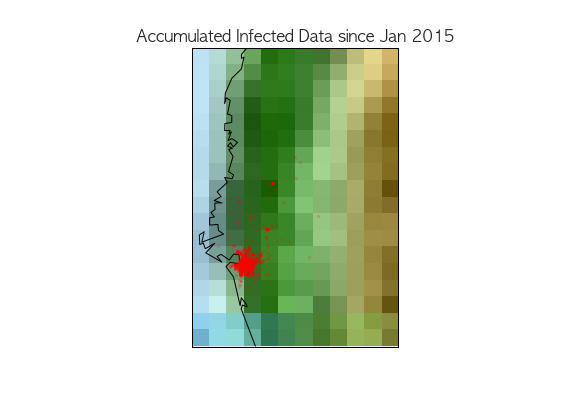
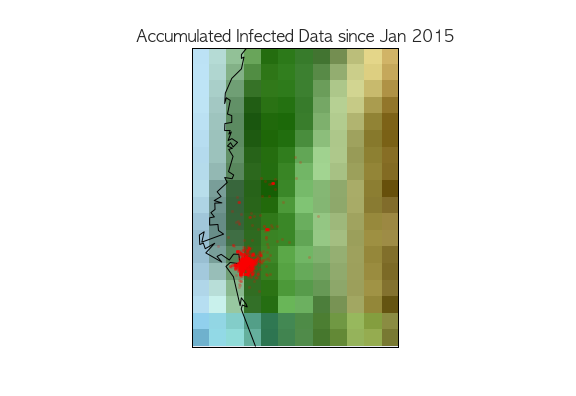
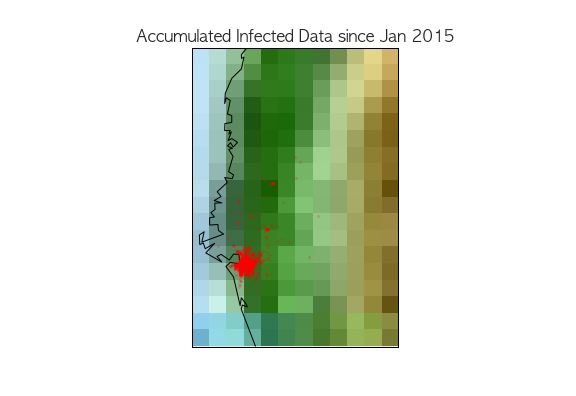
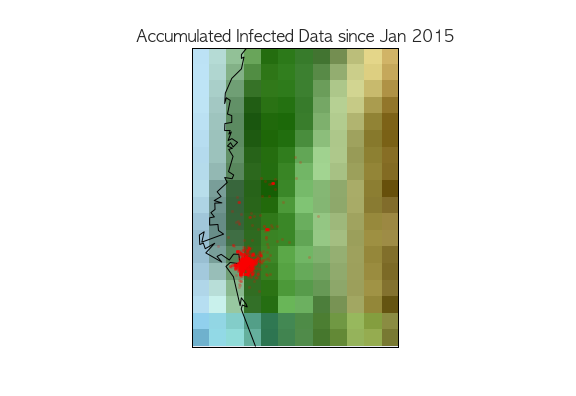
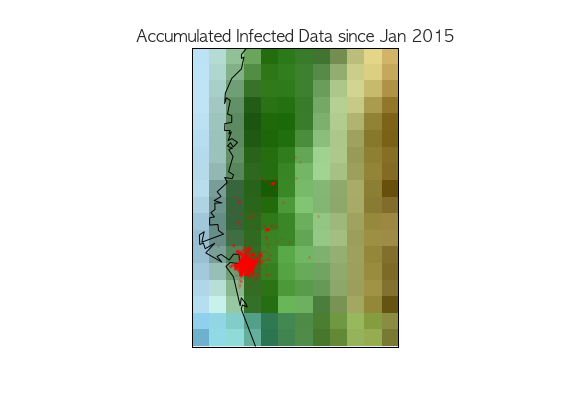
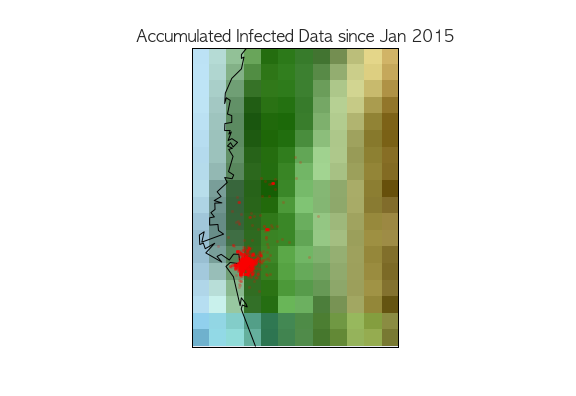
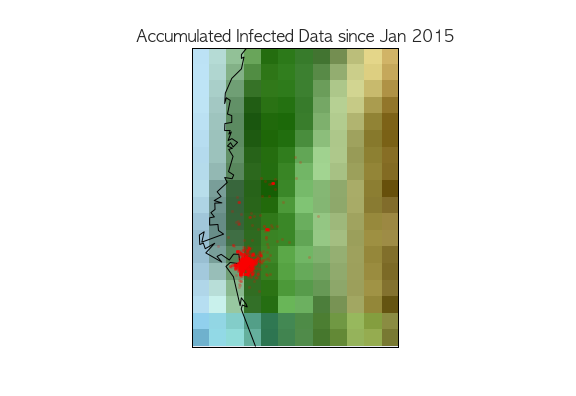
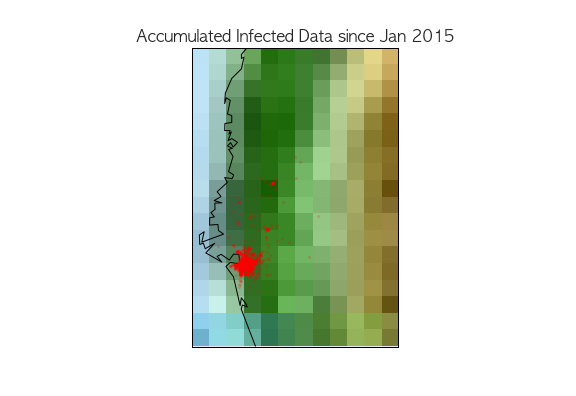

In [106]:
map = Basemap(projection='mill', resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8, lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
map.etopo()

num=10

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]
plt.title("Accumulated Infected Data since Jan 2015",size=16)
def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[:10*i+num], lats[:10*i+num])
    points.set_data(x, y)
    points.set_color('r')
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=200, interval=200, blit=True)

In [ ]:
lons.max(),lons.min(),lats.min(),lats.max()

In [ ]:
rlons=np.arange(lons.min(),lons.max(),0.1)
rlons

In [ ]:
rlats=np.arange(lats.min(),lats.max(),0.15)
rlats

In [ ]:
rlons, rlats = map(*np.meshgrid(rlons,rlats))

In [ ]:
map = Basemap(width=100000, height=100000,
              projection='tmerc', resolution='i',
              lon_0=120.4, lat_0=23.2)

map.drawcoastlines()
map.drawmapboundary()
map.etopo()

In [ ]:
map = Basemap(width=100000, height=100000,
              projection='lcc', resolution='i',
              lon_0=120.4, lat_0=23.2)

map.drawcoastlines()
map.drawmapboundary()
map.etopo()
num=10

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]
plt.title("Accumulated Infected Data since Jan 2015",size=16)
def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[:10*i+num], lats[:10*i+num])
    points.set_data(x, y)
    points.set_color('r')
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=200, interval=200, blit=True)

To investingate whether the dengue epidemic is under control, we have better to make data displayed week by week or month by month:

In [ ]:
map = Basemap(projection='mill', resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8, lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
num=10
map.shadedrelief()

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]
plt.title("Infected Data by Month since Jan 2015",size=20)

def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[Mind[i]:Mind[i+1]],lats[Mind[i]:Mind[i+1]])
    points.set_data(x, y)
    points.set_color('r')
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=12, interval=200, blit=True)

In [ ]:
fig = plt.figure(figsize=(8, 6))
map = Basemap(projection='mill', resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8, lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
num=10
map.bluemarble()
x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]
plt.title("Infected Data by Week since Jan 2015",size=20)

def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[Wind[i]:Wind[i+1]],lats[Wind[i]:Wind[i+1]])
    points.set_data(x, y)
    points.set_color('r')
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=len(Wind)-1, interval=200, blit=True)

In [ ]:
map = Basemap(width=100000, height=100000,
              projection='tmerc', resolution='i',
              lon_0=120.4, lat_0=23.2)

map.drawcoastlines()
map.drawmapboundary()
map.bluemarble()
num=10

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]
plt.title("Infected Data by Week since Jan 2015",size=20)
plt.text(120.6,23,'123')
def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[Wind[i]:Wind[i+1]],lats[Wind[i]:Wind[i+1]])
    points.set_data((x, y))
    points.set_color('r')
    #plt.annotate(i,map(120.6,23.6))
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=len(Wind)-1, interval=200, blit=True)

Data Animated
---
One picture is better than one thousand of words; a animation is better than one thousand of pictures!

There are many solutions to animation of data; this is same to IPython notebook environment. However, some inevitable technical problems restrict what we can do: 

- what kinds of browser used: differnt browser supports different playing format, mp4 can not play by Mac's safari, quicktime movie can play Firefox, Chrome; The worst is that playing formats are also dependent on what kind of operation system works;  

- what kinds of third-party multimedia tool used to implement result. 

For almost browsers and operation systems, picture formats are fully supports without doubt. Here, we use the simplest and native solution to implement the data animation:
```html
use "python" to create picture at each consective time, save it in certain directory, and use "html/javascript" to display picture by picture, i.e. animation playing. 
```
This comes some advantages:
- browser independent since it is standard HTML/javascript implement; 
- working sheet would not be grown too big to play, snice all the pictures are saved in elsewhere independently. 

In [ ]:
fig = plt.figure(figsize=(5,5)) 
map = Basemap(projection='mill' , 
                              resolution='h' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

for i in np.arange(round(len(lons)/100-1)):
    map.scatter(lons[:3+100*i], lats[:3+i*100], latlon=True,
          s=3, marker='o',  color="steelblue", alpha=0.8); 
    plt.savefig("mapdata/base%05d.png" %i, dpi=75)

In [ ]:
round(len(lons)/10)-1

In [ ]:
def html_movie(plotfiles, interval_ms=300, width=400, height=500,casename='movie'):
    import os
    if not isinstance(plotfiles, (tuple,list)):
        raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
                        (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    if missing_files:
        raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])

    ext = os.path.splitext(plotfiles[0])[-1]
    if ext == '.png' or ext == '.jpg' or ext == '.jpeg' or ext == 'gif':
        pass
    else:
        raise ValueError('Plotfiles (%s, ...) must be PNG files with '\
                         'extension .png' % plotfiles[0])
        
    header = """\
<html>
<head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width" />
</head>
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    input{
       font-family:  Georgia, serif;
       font-size: 1em; /* 20px / 10px */
       color: #000 ;
       background-color: #ffb200 ;    
       border: 2px outset #b37d00 ;
       border-radius: 10px;
       width: 60px ;
       text-decoration: none ;
       background-color: #9cf ;
       border-top: 1px solid #c0ffff ;
       border-right: 1px solid #00f ;
       border-bottom: 1px solid #00f ;
       border-left: 1px solid #c0ffff ;
    }
    .push-down{
       border: 1px solid #38538c;
       background-color: #9cf;
       //color: #FFFFFF;
       text-shadow: 0px -1px 1px #213052;
       box-shadow: inset 0 1px 10px 1px #5D88E3, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:hover{
       background: transparent;
       box-shadow: inset 0 0px 20px 1px #88ADFC, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:active{
       box-shadow: inset 0 1px 10px 1px #5B89EB, 0 1px 0 #1A2847, 0 2px 0 #1C2D4D, 0px 3px 6px rgba(0,0,0,.9);
       margin-top: 10px;
    } 
</style> 
<body>
<div align="center">
"""
    no_images = len(plotfiles)
    jscode = """
<script language="Javascript">
<!---
var num_images_%(casename)s = %(no_images)d;
var img_width = %(width)d;
var img_height = %(height)d;
var interval = %(interval_ms)d;
var images_%(casename)s = new Array();

function preload_images_%(casename)s()
{
   t = document.getElementById("progress");
""" % vars()

    i = 0
    for fname in plotfiles:
        jscode += """
   t.innerHTML = "Preloading image ";
   images_%(casename)s[%(i)s] = new Image(img_width, img_height);
   images_%(casename)s[%(i)s].src = "%(fname)s";
        """ % vars()
        i = i+1
    jscode += """
   t.innerHTML = "";
}

function tick_%(casename)s()
{
   if (frame_%(casename)s > num_images_%(casename)s - 1)
       frame_%(casename)s = 0;

   document.movie.src = images_%(casename)s[frame_%(casename)s].src;
   frame_%(casename)s += 1;
   tt = setTimeout("tick_%(casename)s()", interval);
}

function startup_tmpmovie()
{
   preload_images_%(casename)s();
   frame_%(casename)s = 0;
   setTimeout("tick_%(casename)s()", interval);
}

function stopit()
{ clearTimeout(tt); }

function restart_tmpmovie()
{ tt = setTimeout("tick_%(casename)s()", interval); }

function slower()
{ interval = interval/0.7; }

function faster()
{ interval = interval*0.7; }

// --->
</script>
""" % vars()
    plotfile0 = plotfiles[0]
    form = """
<form>
&nbsp;
<input type="button" class="push-down" value="Play" onClick="startup_tmpmovie()">
<input type="button" class="push-down" value="Pause" onClick="stopit()">
<input type="button" class="push-down" value="Replay" onClick="restart_tmpmovie()">
&nbsp;
<input type="button" class="push-down" value="Slower" onClick="slower()">
<input type="button" class="push-down" value="Faster" onClick="faster()">
</form>

<p><div ID="progress"></div></p>
<img src="%(plotfile0)s" name="movie" border=2/></div>
""" % vars()
    footer = '\n</body>\n</html>\n'
    #print(footer)
    return header, jscode, form, footer

In [ ]:
def movieHTML(files, interval_ms=300, width=400, height=500,output='movie'):
    import os,glob,re
    #if not isinstance(plotfiles, (tuple,list)):
    #    raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
    #                    (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    #missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    #if missing_files:
    #    raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])
    #
    # Don't make movie file, just an html file that can play png files
    #files = self._prop['input_files']
    if isinstance(files, str):
       files = glob.glob(files)
       files.sort()
    #print '\nMaking HTML code for displaying', ', '.join(files)
    fps = 25;
    interval_ms = 1000.0/fps
    #outf = self._prop['output_file']
    
    if output is None:
       output = 'test'
       
    #html_movie(files, interval_ms, casename=casename)   
    
    
    header, jscode, form, footer = html_movie(files, interval_ms, casename=output)
    casename = os.path.splitext(output)[0] + '.html'
    print(casename)
    f = open(casename, 'w')
    f.write(header + jscode + form + footer)
    f.close()

In [ ]:
movieHTML("mapdata/base*.png")

In [107]:
from IPython.core.display import HTML
filename="movie.html"
HTML('<div align="center"><iframe src=%s width=500, height=500></iframe></div>' %filename)

PCA Introduction
---

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. It can be used to find out the trends behind infrustrated data. What PCA seeks to do is to find the Principal Axes in the data ( $X-Y$) axes in 2 dimensions, for instance), and explain how important those axes are in describing the spread distribution of data which discussed here.





Orthogonality of Data 
---
Assume that Standard Gaussian vector $Z=(Z_i)$  are Standard Gaussian vector, and we want  $X=(X_i)$ are a general Gaussian vector with correlation matrix $C = (C_{ij})$. 

As well-known, unit vector, $e^i=(e^i_1,e^i_2,\cdots)$, is eigenvector if $e^i \cdot C = \lambda_i e^i$, with the $\lambda_i$ being the eigenvalues (we use row vectors, hence we multiply from the left). We know that those eigenvectors are orthonormal, ie $e^i \cdot e^j = \delta_{ij}$ where $\delta$ is the well known Kronecker delta.

Now define the vector $X=(X_i)$ as follows:
$$
X = \sum_\mu \sqrt{\lambda_\mu} e^\mu Z_\mu
$$
and the covariance of the $X$ that we want to call $\bar{C}$ for the time is
$$
\bar{C}_{ij} = E[X_i X_j] = \sum_{\mu\nu} \sqrt{\lambda_\mu \lambda_\nu} e^\mu_i e^\nu_j E[Z_\mu Z_\nu]=\sum_{\mu}\lambda_\mu e^\mu_i e^\mu_j
$$
We now multiply the vector $e^i$ from the left
$$
(e^i \bar{C})_j = \sum_\nu e^i_\nu \bar{C}_{\nu j} = \sum_{\nu\mu}\lambda_\mu e^i_\nu e^\mu_\nu e^\mu_j = \sum_\mu \lambda_\mu \delta_{i\mu} e^\mu_j = \lambda_i e^i_j
$$
and we find that the matrix $\bar{C}$ satisfies for all $e^i$ the above eigenvector equation $e^i \cdot \bar{C} = \lambda_i e^i$. Because the $e^i$ form a basis we know that $\bar{C}=C$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats


In [ ]:
data_file = genfromtxt('data/dengue104-2-en.csv', delimiter=',')

date=data_file[1:,1]
lats=data_file[1:,5]
lons=data_file[1:,6]

In [ ]:
L=np.zeros([len(lons),2])
for i in np.arange(len(lons)):
    L[i,0],L[i,1]=lons[i],lats[i]

In [ ]:
L[:,0]

In [ ]:
# Replace the uncertain data, nan, with its former one
# L[2654,0]=L[2653,0]
#L[2564,0]=L[2563,0]
#np.mean(L[:,0])
#print(L[2564:2600,0])

In [ ]:
np.mean(L[:,0])

In [ ]:
plt.plot(L[:,0], L[ :,1], 'og',alpha=0.3)
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca.fit(L[:len(L):10])
pca.fit(L)

print(pca.explained_variance_)
print(pca.components_)

In [ ]:
Lx=max(L[:,0])-min(L[:,0])
Ly=max(L[:,1])-min(L[:,1])
Lx,Ly

In [ ]:
plt.plot(L[ :,0], L[:,1], 'og', alpha=0.2)

# relocation the center to the mean of (lons,lats)
x_mean,y_mean=np.mean(L[:,0]),np.mean(L[:,1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    #v = vector * [Lx,Ly] *5* np.sqrt(length)
    v = vector * np.sqrt(length)*2

    print(np.arctan(v[1]/v[0]))
    plt.plot([x_mean, x_mean+v[0]], [y_mean, y_mean+v[1]], '-k', lw=3,color='red')
#plt.axis('equal');

Note that one of the direction is much prior to the other; we can ignore the latter one more or less. Let us observe 
what the data look like if 70% variance keeps: 

In [ ]:
clf = PCA(0.7)
L_trans = clf.fit_transform(L)
print(L.shape)
print(L_trans.shape)

In [ ]:
L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
#plt.axis('equal');

In [ ]:
rL=np.sqrt(pca.components_[0][0]**2+pca.components_[0][1]**2)
r1=pca.components_[0][0]/rL/16.
r2=pca.components_[0][1]/rL/16.
print(np.arctan(r2/r1))
theta0=np.arctan(pca.components_[0][1]/pca.components_[0][0])

cx,cy=x_mean,y_mean
rparam=np.linspace(0,2*np.pi,100)

rx=r1*np.cos(rparam)*np.cos(theta0)-r2*np.sin(rparam)*np.sin(theta0)
ry=+r1*np.cos(rparam)*np.sin(theta0)+r2*np.sin(rparam)*np.cos(theta0)

#L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
plt.plot(cx+rx,cy+ry,'b--',lw=5)
#plt.axis('equal');

Conclusion
---
The data is now compressed by a factor of 50%, from array (5263,2) to (5263,1), after throwing away 27.5% of the variance! The dimensionality reduction is quite efficient. 